# Supervised

### 🌳 Decision Tree Classifier — Explanation

A **Decision Tree Classifier** is a supervised learning algorithm used for both **classification** and **regression** tasks. It works by splitting the data into branches based on feature values, forming a tree-like structure where each internal node represents a decision rule and each leaf node represents an outcome (class label).

---

#### **Step-by-Step Explanation of the Code**

1. **Importing Libraries**  
   The code imports essential libraries from `scikit-learn` for:
   - Loading datasets (`load_iris`)
   - Splitting data into training and testing sets
   - Training a Decision Tree (`DecisionTreeClassifier`)
   - Evaluating model performance (`accuracy_score`, `classification_report`, `confusion_matrix`)

2. **Loading the Dataset**  
   The **Iris dataset** is used — a classic dataset containing measurements of iris flowers (`sepal length`, `sepal width`, `petal length`, `petal width`) and their corresponding species.

3. **Splitting the Data**  
   The dataset is divided into:
   - **80% training data**
   - **20% testing data**  
   This helps evaluate how well the model generalizes to unseen data.

4. **Creating and Training the Model**  
   The `DecisionTreeClassifier` is initialized with parameters:
   - `criterion='gini'`: uses the Gini impurity measure for splitting  
   - `max_depth=5`: limits the depth of the tree to prevent overfitting  
   - `min_samples_split=2`: minimum samples required to split a node  
   - `min_samples_leaf=1`: minimum samples required at a leaf node  
   - `random_state=42`: ensures reproducible results  

   The model is then **fitted** on the training data.

5. **Making Predictions**  
   The trained model predicts the class labels for the test data (`X_test`).

6. **Evaluating the Model**  
   Several performance metrics are displayed:
   - **Accuracy Score** — proportion of correctly classified samples  
   - **Classification Report** — includes precision, recall, and F1-score for each class  
   - **Confusion Matrix** — shows how many samples were correctly/incorrectly classified per class  

7. **Feature Importance**  
   The model provides **feature importances**, indicating how much each feature contributes to the prediction process. This helps interpret which features are most influential in the classification.

---

#### **Summary**
This implementation demonstrates:
- How to build and train a Decision Tree model using scikit-learn  
- How to evaluate classification performance  
- How to interpret feature importance for model explainability


In [ ]:
"""
Decision Tree Classifier
A tree-based model that splits data based on feature values to make predictions.
"""

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

def train_decision_tree():
    # Load dataset
    data = load_iris()
    X, y = data.data, data.target

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Create and train model
    model = DecisionTreeClassifier(
        criterion='gini',  # or 'entropy' for information gain
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )

    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Decision Tree Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Feature importance
    print("\nFeature Importances:")
    for name, importance in zip(data.feature_names, model.feature_importances_):
        print(f"{name}: {importance:.4f}")

    return model

if __name__ == "__main__":
    model = train_decision_tree()

Decision Tree Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Feature Importances:
sepal length (cm): 0.0170
sepal width (cm): 0.0000
petal length (cm): 0.9046
petal width (cm): 0.0785


### 🌲 Random Forest Classifier — Explanation

A **Random Forest Classifier** is an **ensemble learning method** that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. It is based on the idea that “many weak learners can come together to form a strong learner.”

---

#### **Step-by-Step Explanation of the Code**

1. **Importing Libraries**  
   The code imports essential modules from `scikit-learn` for:
   - Loading datasets (`load_wine`)
   - Splitting data (`train_test_split`)
   - Building a Random Forest model (`RandomForestClassifier`)
   - Evaluating performance (`accuracy_score`, `classification_report`, `cross_val_score`)

2. **Loading the Dataset**  
   The **Wine dataset** is used — it contains chemical analysis data of different wines derived from three grape varieties.

   - **Features**: 13 chemical attributes (like alcohol content, color intensity, etc.)
   - **Target**: Wine class (three categories)

3. **Splitting the Data**  
   The dataset is divided into:
   - **80% training data**
   - **20% testing data**  
   This allows proper evaluation of how the model performs on unseen samples.

4. **Creating and Training the Model**  
   The `RandomForestClassifier` is initialized with key parameters:
   - `n_estimators=100`: number of decision trees in the forest  
   - `max_depth=10`: limits the depth of each tree  
   - `min_samples_split=2`: minimum samples required to split a node  
   - `min_samples_leaf=1`: minimum samples required at a leaf node  
   - `max_features='sqrt'`: number of features to consider when splitting each node  
   - `bootstrap=True`: enables bootstrapping (sampling with replacement)  
   - `random_state=42`: ensures reproducibility  
   - `n_jobs=-1`: uses all available CPU cores for faster training  

   The model is then trained on the training data (`X_train`, `y_train`).

5. **Making Predictions**  
   The trained model predicts labels for the test data (`X_test`).

6. **Evaluating the Model**  
   - **Accuracy Score**: measures how many predictions are correct.  
   - **Cross-Validation (`cv=5`)**: evaluates model performance stability by training/testing across different data splits.  
     - The **mean CV score** and **standard deviation** are displayed.  
   - **Classification Report**: shows precision, recall, and F1-score for each class.

7. **Feature Importance**  
   The Random Forest provides **feature importances**, indicating which features are most influential in decision-making.  
   The code displays the **Top 5 Most Important Features** sorted by their importance scores.

---

#### **Summary**
This implementation demonstrates:
- How to build and train a Random Forest model using scikit-learn  
- How to evaluate the model using both accuracy and cross-validation  
- How to interpret the most influential features in the dataset  

---

#### **Key Concept: Why Random Forests Work Well**
- **Reduces overfitting**: By averaging many trees, it smooths out noise and variance.  
- **Handles missing data and noise** effectively.  
- **Provides feature importance** for interpretability.  
- **Parallelizable**: multiple trees can be trained simultaneously, improving performance.


In [ ]:
"""
Random Forest Classifier
An ensemble method that builds multiple decision trees and merges them together.
"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def train_random_forest():
    # Load dataset
    data = load_wine()
    X, y = data.data, data.target

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Create and train model
    model = RandomForestClassifier(
        n_estimators=100,      # number of trees
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',   # features to consider at each split
        bootstrap=True,        # use bootstrap samples
        random_state=42,
        n_jobs=-1              # use all CPU cores
    )

    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random Forest Accuracy: {accuracy:.4f}")

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

    # Feature importance
    print("\nTop 5 Most Important Features:")
    feature_imp = sorted(zip(data.feature_names, model.feature_importances_),
                        key=lambda x: x[1], reverse=True)
    for name, importance in feature_imp[:5]:
        print(f"{name}: {importance:.4f}")

    return model

if __name__ == "__main__":
    model = train_random_forest()

Random Forest Accuracy: 1.0000
Cross-validation scores: [0.97222222 0.94444444 0.97222222 0.97142857 1.        ]
Mean CV Score: 0.9721 (+/- 0.0351)

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Top 5 Most Important Features:
flavanoids: 0.2023
color_intensity: 0.1712
proline: 0.1390
alcohol: 0.1124
od280/od315_of_diluted_wines: 0.1116


### Support Vector Machine (SVM) — Explanation

A **Support Vector Machine (SVM)** is a **supervised learning algorithm** that finds the **optimal hyperplane** separating classes in a high-dimensional space. The main goal is to maximize the **margin** between data points of different classes, ensuring better generalization.

---

#### **Step-by-Step Explanation of the Code**

1. **Importing Libraries**  
   The code uses modules from `scikit-learn` for:
   - Loading datasets (`load_breast_cancer`)
   - Splitting data (`train_test_split`)
   - Scaling features (`StandardScaler`)
   - Building and tuning the SVM model (`SVC`, `GridSearchCV`)
   - Evaluating model performance (`accuracy_score`, `classification_report`, `confusion_matrix`)

2. **Loading the Dataset**  
   The **Breast Cancer dataset** is used — it contains measurements of cell nuclei from breast mass images and classifies samples as **malignant** or **benign**.

   - **Features:** 30 numerical attributes (e.g., radius, texture, smoothness)
   - **Target:** Binary class (0 = malignant, 1 = benign)

3. **Splitting the Data**  
   The dataset is divided into:
   - **80% training data**
   - **20% testing data**  
   This ensures the model is evaluated on unseen examples.

4. **Feature Scaling (Important for SVMs)**  
   Since SVMs are **sensitive to feature scales**, the features are standardized using `StandardScaler`.  
   - `fit_transform()` is applied on the training data  
   - `transform()` is applied on the test data  
   This ensures all features have a mean of 0 and a standard deviation of 1.

5. **Creating and Training the Model**  
   The `SVC` (Support Vector Classifier) is initialized with:
   - `C=1.0`: regularization parameter controlling the trade-off between maximizing the margin and minimizing classification error  
   - `kernel='rbf'`: radial basis function kernel, suitable for non-linear data  
   - `gamma='scale'`: automatically sets kernel coefficient  
   - `probability=True`: enables probability estimates for each class  
   - `random_state=42`: ensures reproducibility  

   The model is trained on the scaled training data.

6. **Making Predictions**  
   The model predicts labels for the test data using `model.predict()`.

7. **Evaluating the Model**  
   - **Accuracy Score**: percentage of correctly predicted labels  
   - **Number of Support Vectors**: shows how many data points lie on or near the decision boundary  
   - **Classification Report**: includes precision, recall, F1-score, and support for each class  
   - **Confusion Matrix**: displays counts of correct and incorrect predictions per class  

8. **Hyperparameter Tuning with GridSearchCV**  
   To optimize performance, a **grid search** is performed over combinations of hyperparameters:
   - `C`: [0.1, 1, 10]  
   - `gamma`: ['scale', 'auto']  
   - `kernel`: ['rbf', 'linear']  

   `GridSearchCV` performs **5-fold cross-validation** to find the best parameters and reports:
   - `best_params_`: optimal hyperparameters  
   - `best_score_`: best cross-validation accuracy  

---

#### **Summary**
This implementation demonstrates:
- How to build and train a Support Vector Machine using scikit-learn  
- The importance of **feature scaling** in SVMs  
- How to **evaluate** model performance using standard metrics  
- How to perform **hyperparameter tuning** using grid search for better accuracy  

---

#### **Key Concepts**

- **Hyperplane:** A boundary that separates different classes in the feature space.  
- **Support Vectors:** Data points closest to the hyperplane that directly influence its position and orientation.  
- **Margin:** The distance between the hyperplane and the nearest support vectors — SVM maximizes this margin.  

---

#### **Mathematical Formulation**

$$
\min_{w, b} \quad \frac{1}{2} \|w\|^2
$$

**Subject to:**

$$
y_i (w^T x_i + b) \geq 1 \quad \forall i = 1, \dots, n
$$

---

#### **Variable Definitions**

| Symbol | Meaning |
|--------|---------|
| $w$ | Weight vector (normal to the hyperplane) |
| $b$ | Bias term (offset from origin) |
| $x_i$ | Feature vector of the $i$-th sample |
| $y_i \in \{+1, -1\}$ | True class label |
| $\|w\|^2$ | Squared norm of the weight vector |

---

**In summary:**  
The SVM seeks the most **optimal separating boundary** that generalizes well to unseen data, making it highly effective for both **linear and non-linear classification problems**.

In [ ]:
"""
Support Vector Machine (SVM)
Finds the hyperplane that best separates classes in high-dimensional space.
"""

from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

def train_svm():
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale features (important for SVM!)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train model
    model = SVC(
        C=1.0,                # regularization parameter
        kernel='rbf',         # 'linear', 'poly', 'rbf', 'sigmoid'
        gamma='scale',        # kernel coefficient
        random_state=42,
        probability=True      # enable probability estimates
    )

    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"SVM Accuracy: {accuracy:.4f}")
    print(f"Number of support vectors: {model.n_support_}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Hyperparameter tuning with GridSearch
    print("\n--- Hyperparameter Tuning ---")
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'linear']
    }

    grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    return model, scaler

if __name__ == "__main__":
    model, scaler = train_svm()

SVM Accuracy: 0.9825
Number of support vectors: [53 51]

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:
[[41  2]
 [ 0 71]]

--- Hyperparameter Tuning ---
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.9758


### K-Nearest Neighbors (KNN) — Explanation

The **K-Nearest Neighbors (KNN)** algorithm is a simple, non-parametric, **instance-based** learning method used for **classification** and **regression**.  
It classifies a new data point by looking at the **k nearest neighbors** in the training data and assigning the majority class among them.

---

#### **Step-by-Step Explanation of the Code**

1. **Importing Libraries**  
   The code imports:
   - The KNN classifier from `sklearn.neighbors`
   - The **Digits dataset** from `sklearn.datasets`
   - Preprocessing tools (`StandardScaler`)
   - Model evaluation metrics (`accuracy_score`, `classification_report`)
   - Visualization (`matplotlib.pyplot`)

2. **Loading the Dataset**  
   The **Digits dataset** contains images of handwritten digits (0–9), represented as 8×8 pixel images converted into numerical feature vectors.

   - **Features:** 64 pixel intensity values per image  
   - **Target:** Digit labels (0–9)

3. **Splitting the Data**  
   The dataset is divided into:
   - **80% training data**
   - **20% testing data**  
   to evaluate model performance on unseen samples.

4. **Feature Scaling**  
   KNN relies on distance metrics, so **feature scaling is crucial**.  
   - `StandardScaler` standardizes features to have mean = 0 and standard deviation = 1.  
   - Both training and test data are scaled.

5. **Creating and Training the Model**  
   The `KNeighborsClassifier` is initialized with:
   - `n_neighbors=5`: uses the 5 nearest neighbors  
   - `weights='uniform'`: all neighbors contribute equally (can be changed to `'distance'`)  
   - `algorithm='auto'`: automatically selects the most efficient search algorithm  
   - `metric='minkowski'` with `p=2`: corresponds to Euclidean distance  
   - `n_jobs=-1`: uses all CPU cores for parallel computation  

   The model is then trained on the scaled training data.

6. **Making Predictions**  
   The trained model predicts digit classes for the test data using `model.predict()`.

7. **Evaluating the Model**  
   - **Accuracy Score**: measures how many predictions are correct  
   - **Classification Report**: includes precision, recall, and F1-score for each digit class  

8. **Finding the Optimal K Value**  
   The algorithm’s performance depends on the choice of **k**.  
   The code:
   - Loops through `k` values from 1 to 30  
   - Calculates accuracy for each  
   - Finds the **optimal k** with the highest accuracy  

   A plot of **K vs Accuracy** is generated and saved as `knn_k_optimization.png`, showing how accuracy changes as `k` increases.

---

#### **Summary**
This implementation demonstrates:
- How to build and train a **K-Nearest Neighbors** classifier  
- The importance of **feature scaling** for distance-based algorithms  
- How to determine the **optimal k value** for best accuracy  
- How to visualize model performance as a function of `k`

---

#### **Key Concepts**

- **Instance-Based Learning:** KNN stores all training data and classifies new data based on proximity to existing samples.  
- **Distance Metric:** Usually Euclidean distance ($p = 2$) or Manhattan distance ($p = 1$).  
- **Bias–Variance Trade-off:**
  - Small $k$ → low bias, high variance (may overfit)
  - Large $k$ → high bias, low variance (may underfit)

---

#### **Mathematical Distance Formula**

$$
D(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p}
$$

- For **Euclidean distance**: $p = 2$  
- For **Manhattan distance**: $p = 1$

---

#### **Prediction Rule**

A new point $x$ is assigned the label:

$$
\hat{y} = \text{mode} \left\{ y_{(1)}, y_{(2)}, \dots, y_{(k)} \right\}
$$

where $y_{(1)}, \dots, y_{(k)}$ are the labels of the $k$ nearest training points to $x$.

---

**In summary:**  
KNN is intuitive, easy to implement, and performs well for small to medium-sized datasets. However, it can be computationally expensive for large datasets because it needs to compute distances to all training points during prediction.


KNN Accuracy: 0.9750

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      1.00      0.98        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360


--- Finding Optimal K ---
Optimal K: 1 with accuracy: 0.9778

Plot saved as 'knn_k_optimization.png'


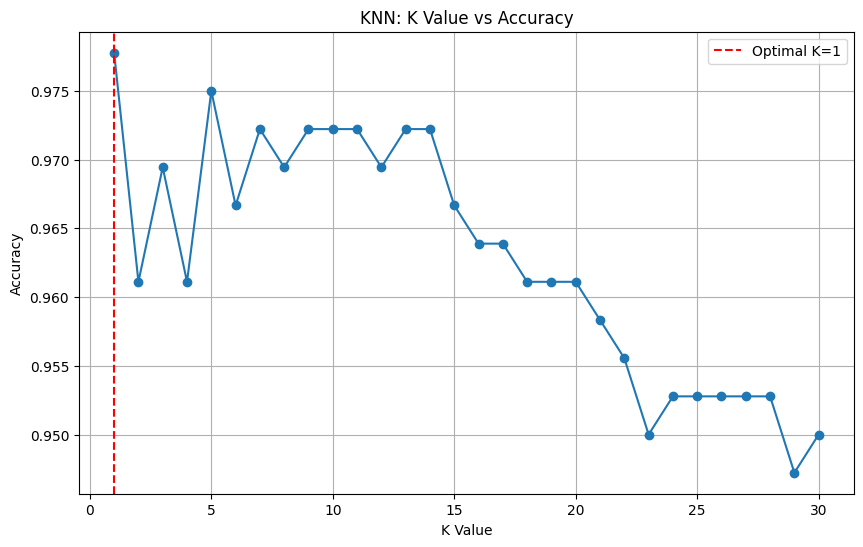

In [ ]:
"""
K-Nearest Neighbors (KNN)
Classifies based on the majority class among k nearest neighbors.
"""

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

def train_knn():
    # Load dataset
    data = load_digits()
    X, y = data.data, data.target

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train model
    model = KNeighborsClassifier(
        n_neighbors=5,           # number of neighbors
        weights='uniform',       # 'uniform' or 'distance'
        algorithm='auto',        # 'ball_tree', 'kd_tree', 'brute', 'auto'
        metric='minkowski',      # distance metric
        p=2,                     # p=2 for Euclidean distance
        n_jobs=-1
    )

    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"KNN Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Find optimal K
    print("\n--- Finding Optimal K ---")
    k_range = range(1, 31)
    scores = []

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        scores.append(knn.score(X_test_scaled, y_test))

    optimal_k = k_range[np.argmax(scores)]
    print(f"Optimal K: {optimal_k} with accuracy: {max(scores):.4f}")

    # Plot K vs Accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, scores, marker='o')
    plt.xlabel('K Value')
    plt.ylabel('Accuracy')
    plt.title('KNN: K Value vs Accuracy')
    plt.grid(True)
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K={optimal_k}')
    plt.legend()
    plt.savefig('knn_k_optimization.png')
    print("\nPlot saved as 'knn_k_optimization.png'")

    return model, scaler

if __name__ == "__main__":
    model, scaler = train_knn()

### Naive Bayes Classifier — Explanation

The **Naive Bayes Classifier** is a **probabilistic machine learning algorithm** based on **Bayes' Theorem**, assuming all features are **independent** given the class label.  
Despite this "naive" assumption, it often performs remarkably well for both numerical and text data.

---

#### **Step-by-Step Explanation of the Code**

1. **Importing Libraries**  
   The code imports:
   - Naive Bayes models from `sklearn.naive_bayes`:
     - `GaussianNB` for continuous features  
     - `MultinomialNB` for count data (e.g., text)  
     - `BernoulliNB` for binary features  
   - Datasets from `sklearn.datasets`
   - `CountVectorizer` for text preprocessing
   - Evaluation metrics (`accuracy_score`, `classification_report`, `confusion_matrix`)

---

### Gaussian Naive Bayes (Continuous Data)

1. **Dataset:**  
   Uses the **Iris dataset** — continuous features (petal/sepal length & width).

2. **Core Idea:**  
   Assumes each feature follows a **Gaussian distribution** per class.

3. **Training:**  
   `GaussianNB` uses `var_smoothing` to stabilize variance estimates.

4. **Output:**  
   Accuracy, classification report, and class priors.

---

#### **Bayes' Theorem**

$$
P(C_k | x) = \frac{P(x | C_k) \cdot P(C_k)}{P(x)}
$$

---

#### **Gaussian Likelihood**

For each feature $x_i$ in class $C_k$:

$$
P(x_i | C_k) = \frac{1}{\sqrt{2\pi \sigma_k^2}} \exp\left( -\frac{(x_i - \mu_k)^2}{2\sigma_k^2} \right)
$$

---

### Multinomial Naive Bayes (Text Classification)

1. **Dataset:**  
   Subset of **20 Newsgroups** (`sci.space`, `comp.graphics`).

2. **Preprocessing:**  
   `CountVectorizer` → word frequency matrix.

3. **Training:**  
   `MultinomialNB` with **Laplace smoothing** (`alpha`).

4. **Output:**  
   Accuracy + most predictive words per class.

---

#### **Multinomial Prediction**

$$
P(C_k | x) \propto P(C_k) \prod_{i=1}^{n} P(x_i | C_k)
$$

Smoothed probability:

$$
P(x_i | C_k) = \frac{\text{count}(w_i, C_k) + \alpha}{\text{total words in } C_k + \alpha \cdot V}
$$

$V$ = vocabulary size

---

### Bernoulli Naive Bayes (Binary Features)

1. **Dataset:**  
   Synthetic binary data via `make_classification`.

2. **Input:**  
   Features binarized: $1$ if value > 0, else $0$.

3. **Model:**  
   `BernoulliNB` on binary matrix.

4. **Output:**  
   Accuracy and confusion matrix.

---

#### **Bernoulli Likelihood**

$$
P(x_i | C_k) =
\begin{cases}
p_{k,i} & \text{if } x_i = 1 \\
1 - p_{k,i} & \text{if } x_i = 0
\end{cases}
$$

---

#### **Summary Table**

| Variant | Data Type | Best For |
|--------|-----------|---------|
| **GaussianNB** | Continuous | Sensor readings, measurements |
| **MultinomialNB** | Counts | Text classification, bag-of-words |
| **BernoulliNB** | Binary (0/1) | Document presence/absence, spam |

---

#### **Advantages**
- Extremely fast training and prediction  
- Works well with high-dimensional data  
- Needs little training data

#### **Limitations**
- Strong independence assumption  
- Poor when features are highly correlated

---

**In summary:**  
Naive Bayes is a **fast, interpretable, and surprisingly effective** classifier — especially powerful for **text classification** and **real-time prediction**.


In [ ]:
"""
Naive Bayes Classifier
Probabilistic classifier based on Bayes' theorem with independence assumptions.
"""

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.datasets import load_iris, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

def train_gaussian_nb():
    """Gaussian Naive Bayes - for continuous features"""
    print("=" * 50)
    print("GAUSSIAN NAIVE BAYES")
    print("=" * 50)

    # Load dataset
    data = load_iris()
    X, y = data.data, data.target

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Create and train model
    model = GaussianNB(
        var_smoothing=1e-9  # portion of largest variance added to variances
    )

    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

    print("\nClass Prior Probabilities:")
    for i, prob in enumerate(model.class_prior_):
        print(f"{data.target_names[i]}: {prob:.4f}")

    return model

def train_multinomial_nb():
    """Multinomial Naive Bayes - for discrete count data (text classification)"""
    print("\n" + "=" * 50)
    print("MULTINOMIAL NAIVE BAYES (Text Classification)")
    print("=" * 50)

    # Load text data
    categories = ['sci.space', 'comp.graphics']
    newsgroups = fetch_20newsgroups(
        subset='all',
        categories=categories,
        remove=('headers', 'footers', 'quotes'),
        random_state=42
    )

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        newsgroups.data, newsgroups.target, test_size=0.2, random_state=42
    )

    # Vectorize text
    vectorizer = CountVectorizer(max_features=1000, stop_words='english')
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)

    # Create and train model
    model = MultinomialNB(alpha=1.0)  # alpha is smoothing parameter
    model.fit(X_train_counts, y_train)

    # Make predictions
    y_pred = model.predict(X_test_counts)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=categories))

    # Show most informative features
    print("\nMost informative features per class:")
    feature_names = vectorizer.get_feature_names_out()
    for i, category in enumerate(categories):
        top_indices = np.argsort(model.feature_log_prob_[i])[-10:]
        top_features = [feature_names[idx] for idx in top_indices]
        print(f"\n{category}: {', '.join(top_features)}")

    return model, vectorizer

def train_bernoulli_nb():
    """Bernoulli Naive Bayes - for binary/boolean features"""
    print("\n" + "=" * 50)
    print("BERNOULLI NAIVE BAYES")
    print("=" * 50)

    # Generate binary data
    from sklearn.datasets import make_classification
    X, y = make_classification(
        n_samples=1000,
        n_features=20,
        n_informative=10,
        n_redundant=5,
        random_state=42
    )

    # Binarize features
    X_binary = (X > 0).astype(int)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_binary, y, test_size=0.2, random_state=42
    )

    # Create and train model
    model = BernoulliNB(alpha=1.0, binarize=0.0)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return model

if __name__ == "__main__":
    gaussian_model = train_gaussian_nb()
    multinomial_model, vectorizer = train_multinomial_nb()
    bernoulli_model = train_bernoulli_nb()

GAUSSIAN NAIVE BAYES

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Class Prior Probabilities:
setosa: 0.3333
versicolor: 0.3417
virginica: 0.3250

MULTINOMIAL NAIVE BAYES (Text Classification)

Accuracy: 0.9235

Classification Report:
               precision    recall  f1-score   support

    sci.space       0.92      0.92      0.92       192
comp.graphics       0.93      0.93      0.93       200

     accuracy                           0.92       392
    macro avg       0.92      0.92      0.92       392
 weighted avg       0.92      0.92      0.92       392


Most informative features per class:

sci.space: form

### Logistic Regression — Explanation

**Logistic Regression** is a **linear classification model** used for **binary** and **multiclass** problems.  
It predicts **probabilities** using the **logistic (sigmoid) function**, mapping any real number into the range **[0, 1]**.

---

#### **Step-by-Step Explanation of the Code**

1. **Importing Libraries**  
   The code imports:
   - `LogisticRegression` from `sklearn.linear_model`
   - **Breast Cancer dataset** from `sklearn.datasets`
   - `StandardScaler` for feature scaling
   - Metrics: `accuracy_score`, `roc_auc_score`, `classification_report`
   - Visualization: `matplotlib.pyplot`

2. **Loading the Dataset**  
   The **Breast Cancer Wisconsin** dataset:
   - **Features:** 30 numeric attributes (e.g., radius, texture, smoothness)
   - **Target:**
     - `0` = **malignant**
     - `1` = **benign**

3. **Splitting the Data**  
   - **80% training**
   - **20% testing**  
   Ensures evaluation on **unseen data**.

4. **Feature Scaling**  
   Logistic regression is **sensitive to feature scale**.  
   Features are standardized using **z-score normalization**:

   $$
   x' = \frac{x - \mu}{\sigma}
   $$

   where:
   - $\mu$ = mean
   - $\sigma$ = standard deviation

5. **Creating and Training the Model**  
   `LogisticRegression` is initialized with:
   - `penalty='l2'` → **Ridge regularization**
   - `C=1.0` → inverse of regularization strength
   - `solver='lbfgs'` → efficient optimization
   - `max_iter=1000` → ensures convergence
   - `multi_class='auto'` → handles binary/multiclass

   Trained on scaled training data.

6. **Making Predictions**  
   - `y_pred` → predicted class labels
   - `y_proba` → probability of positive class

7. **Model Evaluation**  
   - **Accuracy**:

     $$
     \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Samples}}
     $$

   - **ROC AUC Score**: measures class separation (higher = better)

   - **Classification Report**: precision, recall, F1-score per class

8. **Cross-Validation**  
   **5-fold CV**:
   - Train on 4 folds, test on 1
   - Repeat 5 times
   - Report **mean ± std** of accuracy

9. **Feature Importance**  
   Each feature has a coefficient $w_i$.  
   The linear combination is:

   $$
   z = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n
   $$

   The probability of class 1 is:

   $$
   P(y=1|x) = \frac{1}{1 + e^{-z}}
   $$

   Top 10 features by $|w_i|$ are displayed.

10. **ROC Curve Visualization**  
   Plots:
   - **True Positive Rate (TPR)**: $\frac{TP}{TP + FN}$
   - **False Positive Rate (FPR)**: $\frac{FP}{FP + TN}$

   - AUC = Area Under Curve
   - Saved as `logistic_regression_roc.png`

---

#### **Summary**
This implementation shows how to:
- Train **Logistic Regression** for binary classification
- **Scale features** for stable training
- Evaluate with **Accuracy, ROC AUC, Cross-Validation**
- **Interpret coefficients** for explainability
- **Visualize ROC curve** for performance

---

#### **Key Concepts**

- **Sigmoid Function**:

  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$

- **Decision Rule**:
  - Predict **class 1** if $P(y=1|x) > 0.5$
  - Else **class 0**

- **Regularization**:
  - **L2 (Ridge)** shrinks coefficients
  - Prevents overfitting

---

#### **Mathematical Overview**

| Component | Formula |
|---------|--------|
| **Linear Model** | $ z = \mathbf{w}^T \mathbf{x} + b $ |
| **Sigmoid** | $ P(y=1) = \sigma(z) $ |
| **Prediction** | $ \hat{y} = 1 $ if $ \sigma(z) \geq 0.5 $ |

---

**In summary:**  
**Logistic Regression** is a **simple, interpretable, and probabilistic** model — ideal for **linearly separable data**, **feature importance**, and **baseline comparisons**.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Logistic Regression Accuracy: 0.9737
ROC AUC Score: 0.9974

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Cross-validation scores: [0.97802198 0.96703297 1.         0.97802198 0.94505495]
Mean CV Score: 0.9736 (+/- 0.0357)

Top 10 Most Important Features (by absolute coefficient):
worst texture: -1.3506
radius error: -1.2682
worst symmetry: -1.2082
mean concave points: -1.1198
worst concavity: -0.9431
area error: -0.9072
worst radius: -0.8798
worst area: -0.8418
mean concavity: -0.8015
worst concave points: -0.7782

ROC curve saved as 'logistic_regression_roc.png'


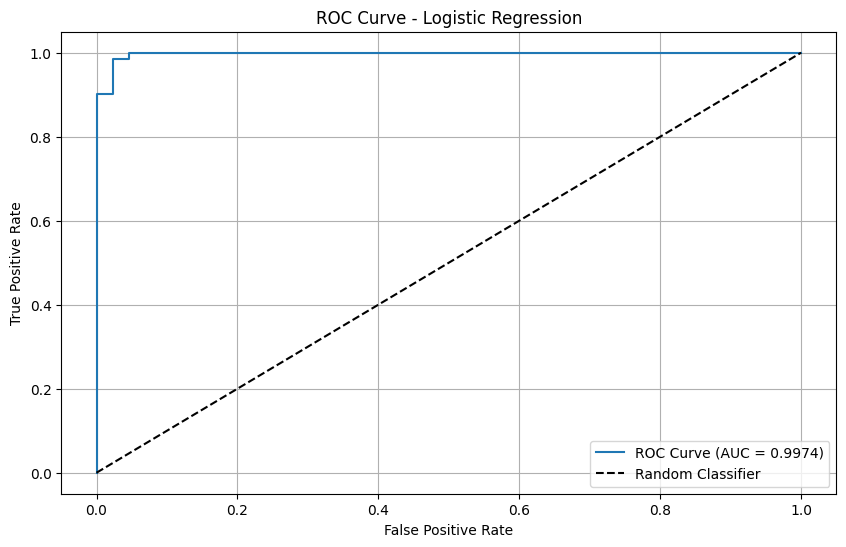

In [ ]:
"""
Logistic Regression
Linear model for binary and multiclass classification using logistic function.
"""

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

def train_logistic_regression():
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train model
    model = LogisticRegression(
        penalty='l2',           # 'l1', 'l2', 'elasticnet', or None
        C=1.0,                  # inverse of regularization strength
        solver='lbfgs',         # 'liblinear', 'saga', 'lbfgs', 'newton-cg'
        max_iter=1000,
        multi_class='auto',     # 'ovr' or 'multinomial'
        random_state=42
    )

    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"Logistic Regression Accuracy: {accuracy:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"\nCross-validation scores: {cv_scores}")
    print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Feature coefficients
    print("\nTop 10 Most Important Features (by absolute coefficient):")
    coef_abs = np.abs(model.coef_[0])
    top_indices = np.argsort(coef_abs)[-10:][::-1]
    for idx in top_indices:
        print(f"{data.feature_names[idx]}: {model.coef_[0][idx]:.4f}")

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Logistic Regression')
    plt.legend()
    plt.grid(True)
    plt.savefig('logistic_regression_roc.png')
    print("\nROC curve saved as 'logistic_regression_roc.png'")

    return model, scaler

if __name__ == "__main__":
    model, scaler = train_logistic_regression()

### Linear Regression — Explanation

**Linear Regression** is a **supervised learning algorithm** used to predict **continuous numerical values**.  
It models the relationship between input features and a target by fitting a **linear equation** to the data.

---

#### **Step-by-Step Explanation of the Code**

1. **Importing Libraries**  
   Imports:
   - `LinearRegression`, `Ridge`, `Lasso`, `ElasticNet` from `sklearn.linear_model`
   - **California Housing dataset** from `sklearn.datasets`
   - `StandardScaler` for feature scaling
   - Metrics: `mean_squared_error`, `mean_absolute_error`, `r2_score`
   - Visualization: `matplotlib.pyplot`

2. **Loading the Dataset**  
   **California Housing** dataset:
   - **Features:** 8 numeric attributes (e.g., avg. rooms, income, house age)
   - **Target:** Median house value (in $100,000s)

3. **Splitting the Data**  
   - **80% training**
   - **20% testing**  
   Evaluates on **unseen data**.

4. **Feature Scaling**  
   Features have different scales → apply **standardization**:

   $$
   x' = \frac{x - \mu}{\sigma}
   $$

   where:
   - $\mu$ = mean
   - $\sigma$ = standard deviation

5. **Ordinary Least Squares (OLS)**  
   Fits:

   $$
   \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
   $$

   Minimizes **Mean Squared Error (MSE)**:

   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$

   Reports:
   - **R² Score**
   - **RMSE**
   - **MAE**

6. **Ridge Regression (L2 Regularization)**  
   Adds penalty on coefficient size:

   $$
   \text{Loss} = \text{MSE} + \alpha \sum_{j=1}^{n} \beta_j^2
   $$

   - $\alpha$ = regularization strength
   - Shrinks coefficients → reduces overfitting
   - Handles **multicollinearity**

7. **Lasso Regression (L1 Regularization)**  
   Uses absolute value penalty:

   $$
   \text{Loss} = \text{MSE} + \alpha \sum_{j=1}^{n} |\beta_j|
   $$

   - Drives some $\beta_j \to 0$ → **feature selection**
   - Output shows number of non-zero coefficients

8. **Elastic Net (L1 + L2)**  
   Combines both:

   $$
   \text{Loss} = \text{MSE} + \alpha \left( \rho \sum |\beta_j| + (1 - \rho) \sum \beta_j^2 \right)
   $$

   - $\rho$ (`l1_ratio`) controls balance
   - Best of both worlds

9. **Coefficient Visualization**  
   Bar plots compare coefficients across models:  
   → Shows **shrinkage** and **sparsity**  
   Saved as: `linear_regression_coefficients.png`

10. **Actual vs Predicted Plot**  
   Scatter plot of true vs predicted values  
   - Perfect predictions lie on **diagonal line**  
   Saved as: `linear_regression_predictions.png`

---

#### **Model Comparison**

| Model | Regularization | Effect | Best For |
|-------|----------------|--------|----------|
| **OLS** | None | Fits data exactly | No multicollinearity |
| **Ridge** | L2 | Shrinks coefficients | Correlated features |
| **Lasso** | L1 | Sets some $\beta = 0$ | Feature selection |
| **Elastic Net** | L1 + L2 | Balanced shrinkage + sparsity | High-dimensional data |

---

#### **Key Metrics**

- **R² Score** (Coefficient of Determination):

  $$
  R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
  $$

  → Closer to 1 = better fit

- **RMSE**:

  $$
  \text{RMSE} = \sqrt{\frac{1}{n} \sum (y_i - \hat{y}_i)^2}
  $$

- **MAE**:

  $$
  \text{MAE} = \frac{1}{n} \sum |y_i - \hat{y}_i|
  $$

---

#### **Takeaways**

- **Linear Regression** assumes **linear relationships**
- **Regularization** improves **generalization**
- **Lasso** → automatic **feature selection**
- **Ridge** → handles **multicollinearity**
- **Elastic Net** → robust **hybrid**

---

**In summary:**  
**Linear Regression** is a **simple, interpretable, and powerful baseline** for regression tasks. With **regularization**, it becomes robust to noise, overfitting, and correlated features.


ORDINARY LEAST SQUARES REGRESSION
R² Score: 0.5758
RMSE: 0.7456
MAE: 0.5332

RIDGE REGRESSION (L2 Regularization)
R² Score: 0.5758
RMSE: 0.7456
MAE: 0.5332

LASSO REGRESSION (L1 Regularization)
R² Score: 0.4814
RMSE: 0.8244
MAE: 0.6222
Number of non-zero coefficients: 3

ELASTIC NET (L1 + L2 Regularization)
R² Score: 0.5148
RMSE: 0.7974
MAE: 0.5970

FEATURE COEFFICIENTS
Coefficient comparison saved as 'linear_regression_coefficients.png'
Prediction plot saved as 'linear_regression_predictions.png'


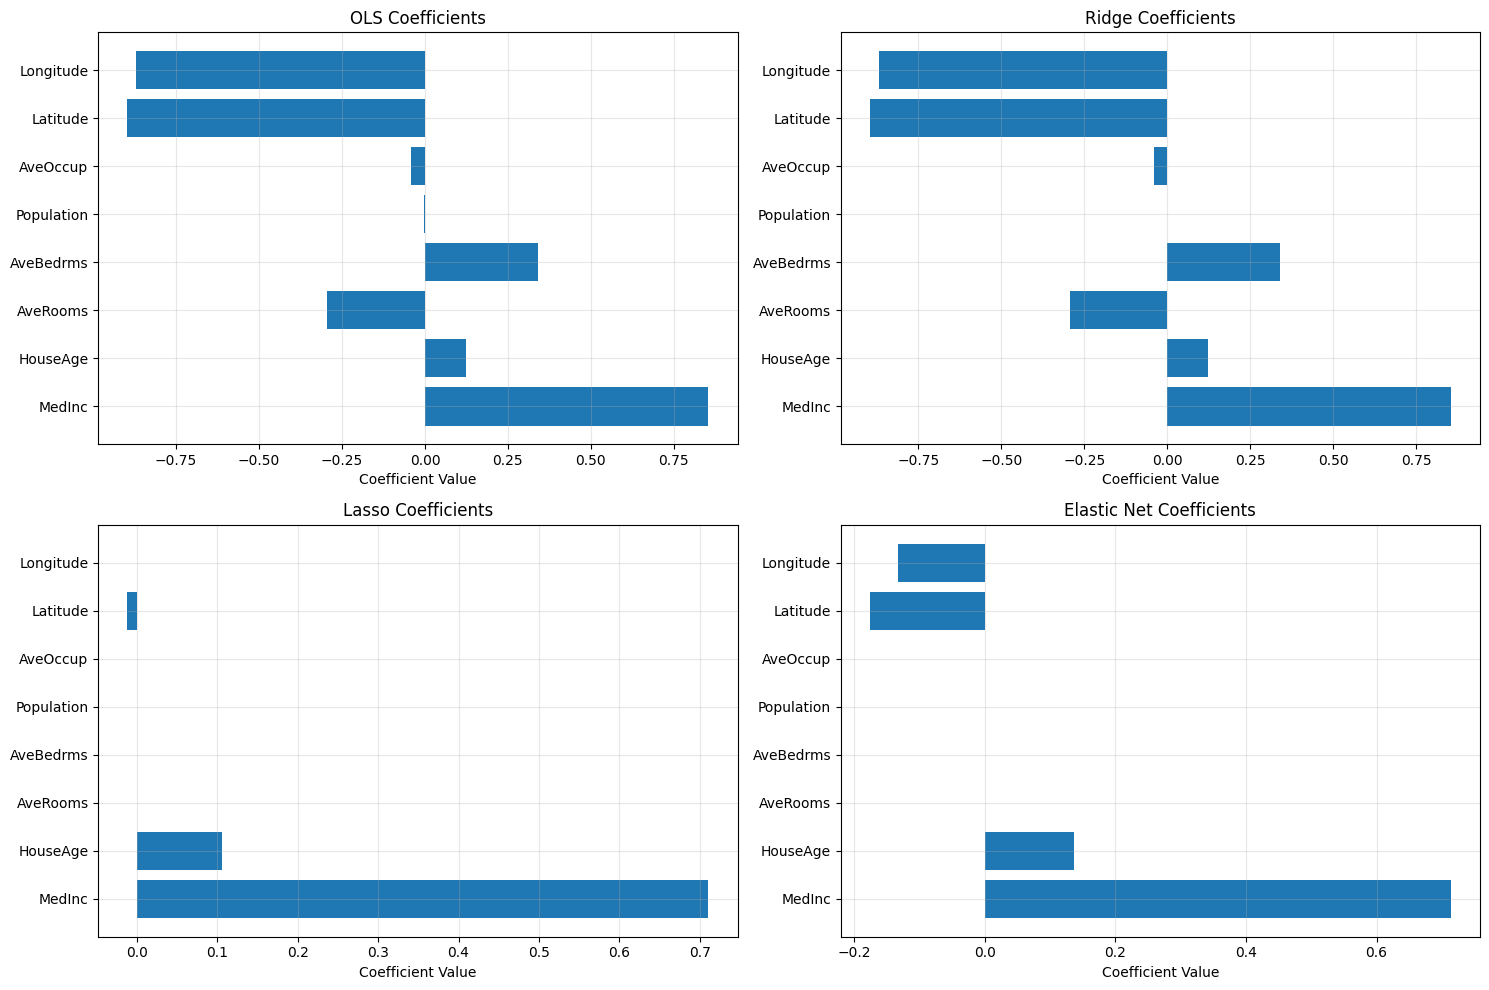

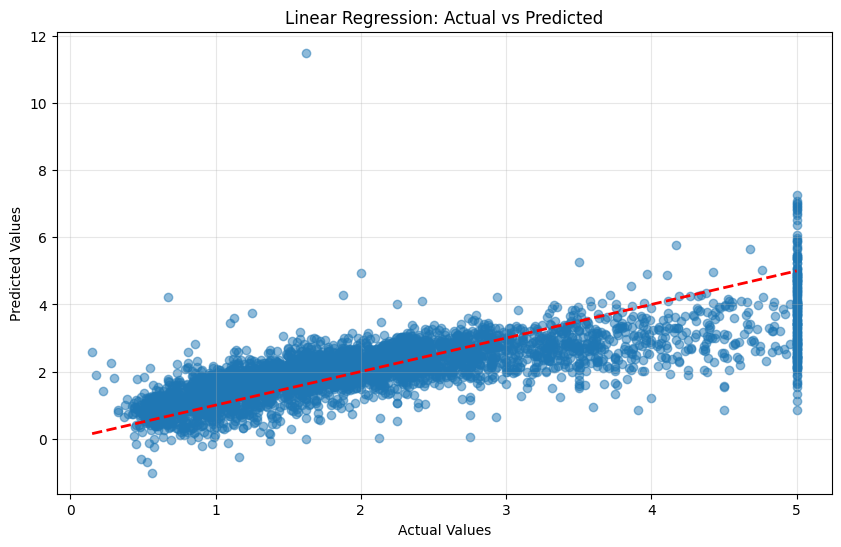

In [ ]:
"""
Linear Regression
Predicts continuous values by fitting a linear relationship between features and target.
"""

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

def train_linear_regression():
    # Load dataset
    data = fetch_california_housing()
    X, y = data.data, data.target

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("=" * 50)
    print("ORDINARY LEAST SQUARES REGRESSION")
    print("=" * 50)

    # Ordinary Least Squares
    ols_model = LinearRegression()
    ols_model.fit(X_train_scaled, y_train)
    y_pred_ols = ols_model.predict(X_test_scaled)

    print(f"R² Score: {r2_score(y_test, y_pred_ols):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ols)):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_ols):.4f}")

    print("\n" + "=" * 50)
    print("RIDGE REGRESSION (L2 Regularization)")
    print("=" * 50)

    # Ridge Regression
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_model.predict(X_test_scaled)

    print(f"R² Score: {r2_score(y_test, y_pred_ridge):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge):.4f}")

    print("\n" + "=" * 50)
    print("LASSO REGRESSION (L1 Regularization)")
    print("=" * 50)

    # Lasso Regression
    lasso_model = Lasso(alpha=0.1, max_iter=10000)
    lasso_model.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_model.predict(X_test_scaled)

    print(f"R² Score: {r2_score(y_test, y_pred_lasso):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso):.4f}")
    print(f"Number of non-zero coefficients: {np.sum(lasso_model.coef_ != 0)}")

    print("\n" + "=" * 50)
    print("ELASTIC NET (L1 + L2 Regularization)")
    print("=" * 50)

    # Elastic Net
    elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
    elastic_model.fit(X_train_scaled, y_train)
    y_pred_elastic = elastic_model.predict(X_test_scaled)

    print(f"R² Score: {r2_score(y_test, y_pred_elastic):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_elastic)):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_elastic):.4f}")

    # Feature importance comparison
    print("\n" + "=" * 50)
    print("FEATURE COEFFICIENTS")
    print("=" * 50)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    models = [ols_model, ridge_model, lasso_model, elastic_model]
    titles = ['OLS', 'Ridge', 'Lasso', 'Elastic Net']

    for ax, model, title in zip(axes.flat, models, titles):
        coef = model.coef_
        ax.barh(data.feature_names, coef)
        ax.set_xlabel('Coefficient Value')
        ax.set_title(f'{title} Coefficients')
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('linear_regression_coefficients.png')
    print("Coefficient comparison saved as 'linear_regression_coefficients.png'")

    # Prediction vs Actual plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_ols, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.grid(True, alpha=0.3)
    plt.savefig('linear_regression_predictions.png')
    print("Prediction plot saved as 'linear_regression_predictions.png'")

    return ols_model, ridge_model, lasso_model, elastic_model, scaler

if __name__ == "__main__":
    models = train_linear_regression()

### Neural Networks — Multi-layer Perceptron (MLP)

**Multi-layer Perceptrons (MLPs)** are **feed-forward artificial neural networks** consisting of **input, hidden, and output layers**.  
They are used for **classification** and **regression** tasks and can model **complex non-linear relationships**.

---

## Step-by-Step Explanation of the Code

### 1. Importing Libraries
The implementation imports:
- `MLPClassifier` and `MLPRegressor` from `sklearn.neural_network`
- Datasets: `load_digits` (classification), `fetch_california_housing` (regression)
- Preprocessing: `StandardScaler`
- Metrics: `accuracy_score`, `classification_report`, `r2_score`, `mean_squared_error`
- Visualization: `matplotlib.pyplot`

---

### 2. Loading the Dataset

- **MLP Classifier:** Uses **Digits dataset**  
  - **Features:** 64 pixel intensity values (8×8 images)  
  - **Target:** Digit labels (0–9)

- **MLP Regressor:** Uses **California Housing dataset**  
  - **Features:** 8 numeric attributes (e.g., average rooms, income)  
  - **Target:** Median house price (continuous)

---

### 3. Splitting the Data
The data is split into:
- **80% training set**
- **20% testing set**

This allows evaluation on **unseen data**.

---

### 4. Feature Scaling
Feature scaling is **critical for neural networks**:

$$
x' = \frac{x - \mu}{\sigma}
$$

where:  
- $\mu$ = mean of the feature  
- $\sigma$ = standard deviation  

Ensures all features contribute equally.

---

### 5. Creating and Training the MLP Classifier
Key parameters:
- `hidden_layer_sizes=(100, 50)` — two hidden layers with 100 and 50 neurons  
- `activation='relu'` — non-linear activation function  
- `solver='adam'` — optimizer  
- `alpha=0.0001` — L2 regularization  
- `learning_rate='adaptive'` — learning rate adjusts based on performance  
- `max_iter=300` — maximum number of iterations  
- `early_stopping=True` — stop training when validation performance stops improving  

**Outputs:**
- `y_pred` — predicted class labels  
- Accuracy score, number of iterations, number of layers  
- Classification report with **precision**, **recall**, **F1-score**  

**Loss curve:** plotted as iterations vs. loss, shows convergence.

---

### 6. Creating and Training the MLP Regressor
Key parameters:
- `hidden_layer_sizes=(100, 50, 25)` — three hidden layers  
- Same activation (`relu`) and optimizer (`adam`)  
- Early stopping with 10% validation split  

**Evaluation metrics:**
- **R² Score** — proportion of variance explained
- **RMSE** — root mean squared error
- Scatter plot comparing **predicted vs actual** values

---

### 7. Comparing Different Architectures
Different network architectures tested:

- `(50,)`, `(100,)`, `(100,50)`, `(100,50,25)`, `(200,100,50)`  
- Accuracy measured for each configuration  

**Observation:**
- More neurons/layers → higher capacity, risk of overfitting  
- Fewer neurons → may underfit

---

## Key Concepts

- **Feed-forward Network:** Data flows from input → hidden → output  
- **Neuron Activation:** For neuron $j$:

$$
a_j = \phi\Big(\sum_i w_{ij} x_i + b_j \Big)
$$

where $\phi$ is the activation function (e.g., ReLU: $\phi(z) = \max(0, z)$)

- **Backpropagation:** Updates weights using gradient descent to minimize loss  
  - **Classification:** Cross-entropy loss  
  - **Regression:** Mean squared error

- **Hyperparameters to tune:**
  - Number of layers and neurons  
  - Activation function  
  - Learning rate and optimizer  
  - Regularization (`alpha`)  

---

## Summary
This implementation demonstrates:
- Building **MLP classifiers** and **regressors** using `sklearn`  
- Importance of **feature scaling**  
- How **network architecture** impacts performance  
- Visualization of **training loss** and **predictions**


MLP CLASSIFIER
Accuracy: 0.9722
Number of iterations: 36
Number of layers: 4

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      0.96      0.96        28
           2       0.94      1.00      0.97        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


Loss curve saved as 'mlp_loss_curve.png'

MLP REGRESSOR
R² Score: 0.7958
RMSE: 0.5173
Number of iterations: 68
Prediction plot saved as 'ml

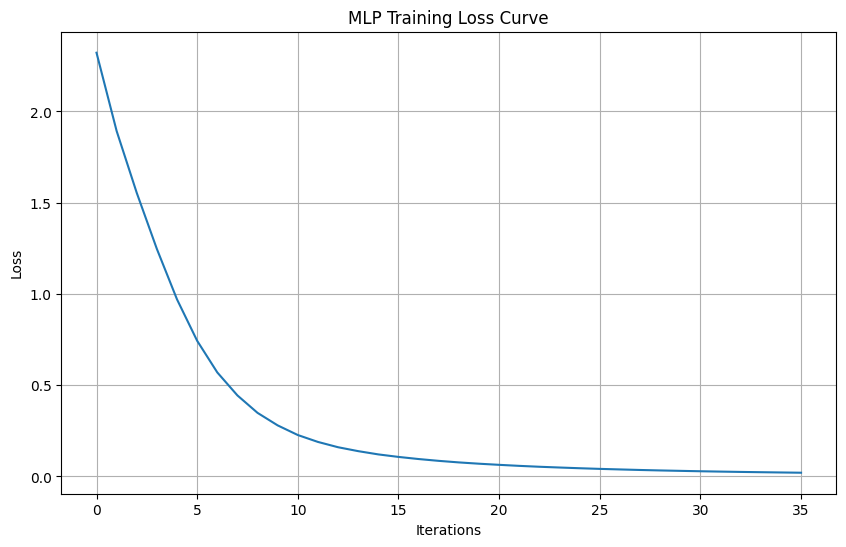

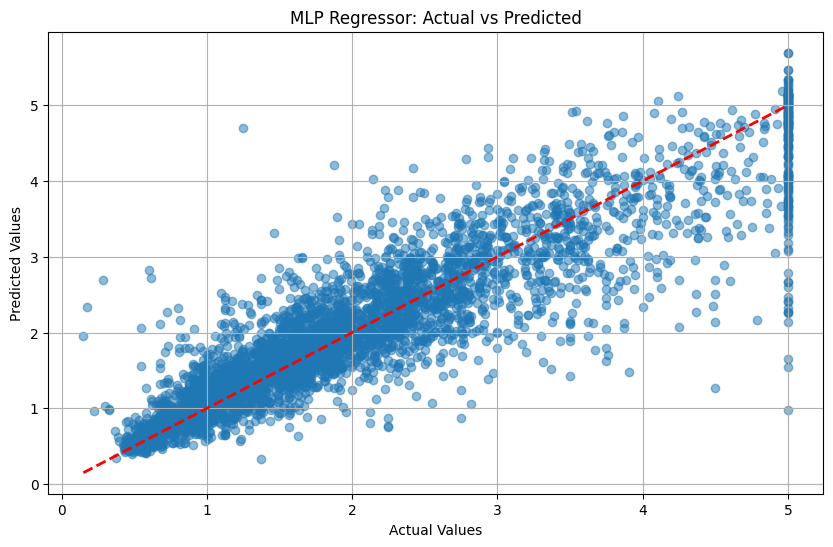

In [ ]:
"""
Neural Networks - Multi-layer Perceptron (MLP)
Feed-forward artificial neural networks with multiple hidden layers.
"""

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.datasets import load_digits, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def train_mlp_classifier():
    """Multi-layer Perceptron for Classification"""
    print("=" * 50)
    print("MLP CLASSIFIER")
    print("=" * 50)

    # Load dataset
    data = load_digits()
    X, y = data.data, data.target

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale features (important for neural networks!)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train model
    model = MLPClassifier(
        hidden_layer_sizes=(100, 50),  # two hidden layers
        activation='relu',              # 'relu', 'tanh', 'logistic'
        solver='adam',                  # 'sgd', 'adam', 'lbfgs'
        alpha=0.0001,                   # L2 regularization
        batch_size='auto',
        learning_rate='adaptive',       # 'constant', 'invscaling', 'adaptive'
        learning_rate_init=0.001,
        max_iter=300,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        verbose=False
    )

    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Number of iterations: {model.n_iter_}")
    print(f"Number of layers: {model.n_layers_}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot loss curve
    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('MLP Training Loss Curve')
    plt.grid(True)
    plt.savefig('mlp_loss_curve.png')
    print("\nLoss curve saved as 'mlp_loss_curve.png'")

    return model, scaler

def train_mlp_regressor():
    """Multi-layer Perceptron for Regression"""
    print("\n" + "=" * 50)
    print("MLP REGRESSOR")
    print("=" * 50)

    # Load dataset
    data = fetch_california_housing()
    X, y = data.data, data.target

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train model
    model = MLPRegressor(
        hidden_layer_sizes=(100, 50, 25),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        learning_rate='adaptive',
        learning_rate_init=0.001,
        max_iter=300,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        verbose=False
    )

    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"Number of iterations: {model.n_iter_}")

    # Plot predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('MLP Regressor: Actual vs Predicted')
    plt.grid(True)
    plt.savefig('mlp_regressor_predictions.png')
    print("Prediction plot saved as 'mlp_regressor_predictions.png'")

    return model, scaler

def compare_architectures():
    """Compare different network architectures"""
    print("\n" + "=" * 50)
    print("COMPARING DIFFERENT ARCHITECTURES")
    print("=" * 50)

    data = load_digits()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    architectures = [
        (50,),
        (100,),
        (100, 50),
        (100, 50, 25),
        (200, 100, 50)
    ]

    results = []
    for arch in architectures:
        model = MLPClassifier(
            hidden_layer_sizes=arch,
            max_iter=200,
            random_state=42,
            verbose=False
        )
        model.fit(X_train_scaled, y_train)
        accuracy = model.score(X_test_scaled, y_test)
        results.append((arch, accuracy))
        print(f"Architecture {arch}: Accuracy = {accuracy:.4f}")

    return results

if __name__ == "__main__":
    clf_model, clf_scaler = train_mlp_classifier()
    reg_model, reg_scaler = train_mlp_regressor()
    architecture_results = compare_architectures()

### Gradient Boosting Algorithms — Explanation

**Gradient Boosting** algorithms are **ensemble methods** that build models **sequentially**, with each new model attempting to **correct errors** of the previous models.  
Popular implementations include **Gradient Boosting (sklearn)**, **XGBoost**, **LightGBM**, and **CatBoost**.

---

## Step-by-Step Explanation of the Code

### 1. Importing Libraries
The code uses:
- `GradientBoostingClassifier` from `sklearn.ensemble`  
- Optional packages: `xgboost`, `lightgbm`, `catboost` (install with `pip install xgboost lightgbm catboost`)  
- Dataset: `load_breast_cancer`  
- Preprocessing and evaluation: `train_test_split`, `accuracy_score`, `classification_report`  

---

### 2. Loading the Dataset
- **Dataset:** Breast Cancer dataset  
  - **Features:** Numeric measurements of tumor properties (30 features)  
  - **Target:** Binary labels — malignant (1) or benign (0)

---

### 3. Splitting the Data
- **80% training**, **20% testing**  
- Ensures evaluation on unseen data.

---

### 4. Training Gradient Boosting Models

#### **4.1 Scikit-learn Gradient Boosting**
Key parameters:
- `n_estimators=100`: number of trees  
- `learning_rate=0.1`: contribution of each tree  
- `max_depth=3`: maximum depth of individual trees  
- `subsample=0.8`: fraction of data per tree  
- `random_state=42`  

Outputs:
- Predicted labels (`y_pred`)  
- Accuracy score and classification report

---

#### **4.2 XGBoost (Extreme Gradient Boosting)**
Key parameters:
- `n_estimators=100`, `learning_rate=0.1`, `max_depth=3`  
- `subsample=0.8`, `colsample_bytree=0.8`  
- `objective='binary:logistic'` for binary classification  
- `eval_metric='logloss'`  

Additional:
- Displays **top 5 important features** ranked by importance

---

#### **4.3 LightGBM (Light Gradient Boosting Machine)**
Key parameters:
- `n_estimators=100`, `learning_rate=0.1`, `max_depth=3`  
- `num_leaves=31`, `subsample=0.8`, `colsample_bytree=0.8`  
- `min_child_samples=20`  

Outputs:
- Accuracy and classification report

---

#### **4.4 CatBoost (Categorical Boosting)**
Key parameters:
- `iterations=100`, `learning_rate=0.1`, `depth=3`  
- Handles categorical features natively  
- `verbose=False` to suppress detailed training output  

Outputs:
- Accuracy and classification report

---

## Key Concepts

- **Sequential Learning:** Each tree focuses on **errors made by previous trees**  
- **Learning Rate:** Controls contribution of each tree; smaller values require more trees  
- **Tree Depth:** Controls model complexity; deeper trees can capture more patterns but risk overfitting  
- **Subsampling / Colsample:** Helps reduce overfitting by training on a subset of samples/features  
- **Feature Importance:** Gradient boosting models can rank features based on their predictive power  

---

## Summary

This implementation demonstrates:
- How to build **Gradient Boosting models** with multiple libraries  
- How **sequential boosting** improves performance over single trees  
- How to evaluate models using **accuracy** and **classification reports**  
- Optional feature importance ranking (XGBoost)


In [ ]:
"""
Gradient Boosting Algorithms
Ensemble methods that build models sequentially to correct previous errors.
Includes: Gradient Boosting, XGBoost, LightGBM, and CatBoost
"""

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Note: Install these with: pip install xgboost lightgbm catboost
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost not installed. Install with: pip install xgboost")

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("LightGBM not installed. Install with: pip install lightgbm")

try:
    from catboost import CatBoostClassifier
    CATBOOST_AVAILABLE = True
except ImportError:
    CATBOOST_AVAILABLE = False
    print("CatBoost not installed. Install with: pip install catboost")

def train_sklearn_gradient_boosting():
    """Scikit-learn's Gradient Boosting (always available)"""
    print("=" * 50)
    print("SKLEARN GRADIENT BOOSTING")
    print("=" * 50)

    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Create and train model
    model = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        min_samples_split=2,
        min_samples_leaf=1,
        subsample=0.8,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

    return model

def train_xgboost():
    """XGBoost - Extreme Gradient Boosting"""
    if not XGBOOST_AVAILABLE:
        return None

    print("\n" + "=" * 50)
    print("XGBOOST")
    print("=" * 50)

    data = load_breast_cancer()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        random_state=42,
        eval_metric='logloss'
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

    # Feature importance
    print("\nTop 5 Important Features:")
    feature_imp = sorted(zip(data.feature_names, model.feature_importances_),
                        key=lambda x: x[1], reverse=True)
    for name, importance in feature_imp[:5]:
        print(f"{name}: {importance:.4f}")

    return model

def train_lightgbm():
    """LightGBM - Light Gradient Boosting Machine"""
    if not LIGHTGBM_AVAILABLE:
        return None

    print("\n" + "=" * 50)
    print("LIGHTGBM")
    print("=" * 50)

    data = load_breast_cancer()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = lgb.LGBMClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        num_leaves=31,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

    return model

def train_catboost():
    """CatBoost - Categorical Boosting"""
    if not CATBOOST_AVAILABLE:
        return None

    print("\n" + "=" * 50)
    print("CATBOOST")
    print("=" * 50)

    data = load_breast_cancer()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = CatBoostClassifier(
        iterations=100,
        learning_rate=0.1,
        depth=3,
        random_state=42,
        verbose=False
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

    return model

if __name__ == "__main__":
    sklearn_model = train_sklearn_gradient_boosting()
    xgb_model = train_xgboost()
    lgb_model = train_lightgbm()
    cat_model = train_catboost()

CatBoost not installed. Install with: pip install catboost
SKLEARN GRADIENT BOOSTING
Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


XGBOOST
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Top 5 Important Features:
mean concave points: 0.2668
worst concave points: 0.1701
worst radius: 0.0944
worst area: 0.0644
worst perimeter: 0.0557

LIGHTGBM
Accuracy: 0.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# Unsupervised

### K-Means Clustering — Explanation

**K-Means** is an **unsupervised learning algorithm** that partitions data into **K clusters**.  
It assigns each data point to the cluster with the **nearest centroid** and iteratively refines the cluster centers.

---

## Step-by-Step Explanation of the Code

### 1. Importing Libraries
The implementation uses:
- `KMeans` from `sklearn.cluster`  
- Synthetic dataset generator: `make_blobs`  
- Preprocessing: `StandardScaler`  
- Evaluation metrics: `silhouette_score`, `davies_bouldin_score`  
- Visualization: `matplotlib.pyplot`  

---

### 2. Generating Synthetic Data
- Uses `make_blobs` to create **300 samples**, **4 clusters**, **2 features**  
- Outputs:
  - `X` — feature matrix  
  - `y_true` — true cluster labels (for reference only)

---

### 3. Feature Scaling
- `StandardScaler` standardizes features (mean=0, std=1)  
- Ensures **distance-based metrics** are meaningful for clustering

---

### 4. Creating and Training the K-Means Model
Key parameters:
- `n_clusters=4` — number of clusters  
- `init='k-means++'` — smart centroid initialization  
- `n_init=10` — number of runs with different seeds  
- `max_iter=300` — maximum iterations per run  
- `random_state=42`  

After training:
- `model.labels_` contains cluster assignments  
- `model.cluster_centers_` contains centroids

---

### 5. Evaluating Clustering Performance
Metrics used:
1. **Silhouette Score ($-1$ to $1$):** higher is better  
   $$ s = \frac{b - a}{\max(a, b)} $$
   - $a$ = mean intra-cluster distance  
   - $b$ = mean nearest-cluster distance
2. **Davies-Bouldin Score:** lower is better  
3. **Inertia:** within-cluster sum of squares (lower = tighter clusters)

---

### 6. Finding the Optimal K
- **Elbow Method:** Plot inertia vs K; elbow indicates best K  
- **Silhouette Score:** Plot score vs K; peak indicates optimal K  
- Loops through K = 2 to 10 to compute both metrics  
- Saves **Elbow and Silhouette plots** as `kmeans_optimization.png`

---

### 7. Visualizing Clusters
- Scatter plot of data colored by cluster label  
- Centroids plotted as red **X markers**  
- Saves visualization as `kmeans_clusters.png`

---

## Key Concepts

- **Cluster Centroid:** Mean of all points in a cluster  
- **Distance Metric:** Typically Euclidean distance  
- **Convergence:** Iteratively updates cluster assignments and centroids until minimal change  
- **Initialization:** K-Means++ reduces sensitivity to random initialization  

---

## Summary
This implementation demonstrates:
- Generating synthetic clustered data  
- Scaling features for distance-based clustering  
- Training a **K-Means model**  
- Evaluating clusters with **Silhouette Score, Davies-Bouldin Score, and inertia**  
- Using **Elbow and Silhouette methods** to find the optimal K  
- Visualizing clusters and centroids


Number of clusters: 4
Silhouette Score: 0.8796 (higher is better)
Davies-Bouldin Score: 0.1678 (lower is better)
Inertia (within-cluster sum of squares): 6.4154

--- Elbow Method for Optimal K ---
Plot saved as 'kmeans_optimization.png'
Cluster visualization saved as 'kmeans_clusters.png'


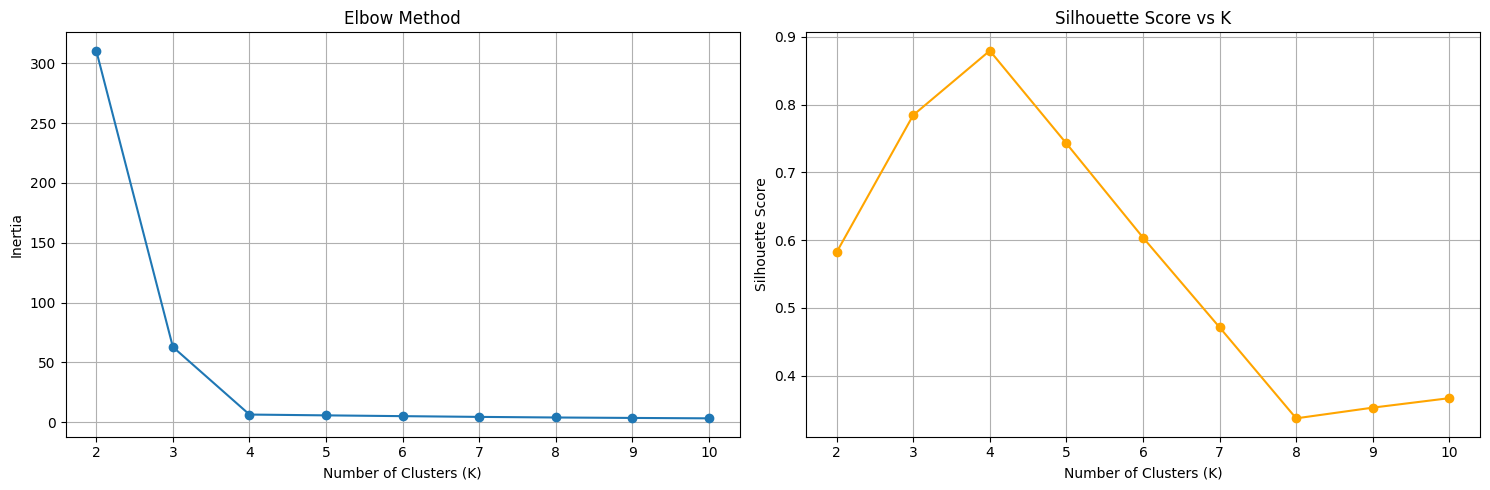

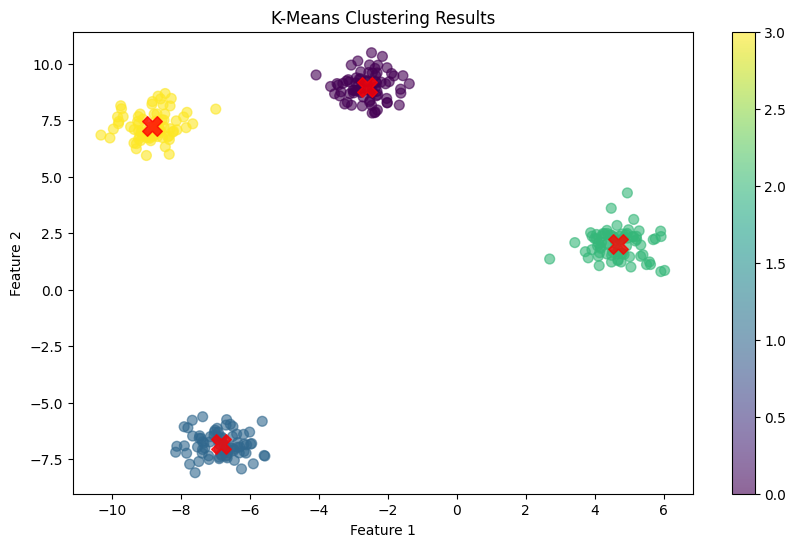

In [ ]:
"""
K-Means Clustering
Unsupervised learning algorithm that partitions data into K clusters.
"""

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

def train_kmeans():
    # Generate synthetic data
    X, y_true = make_blobs(
        n_samples=300,
        centers=4,
        n_features=2,
        cluster_std=0.60,
        random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create and train model
    model = KMeans(
        n_clusters=4,
        init='k-means++',    # smart initialization
        n_init=10,           # number of times to run with different seeds
        max_iter=300,
        random_state=42
    )

    model.fit(X_scaled)
    labels = model.labels_

    # Evaluate
    silhouette_avg = silhouette_score(X_scaled, labels)
    davies_bouldin = davies_bouldin_score(X_scaled, labels)
    inertia = model.inertia_

    print(f"Number of clusters: {model.n_clusters}")
    print(f"Silhouette Score: {silhouette_avg:.4f} (higher is better)")
    print(f"Davies-Bouldin Score: {davies_bouldin:.4f} (lower is better)")
    print(f"Inertia (within-cluster sum of squares): {inertia:.4f}")

    # Elbow method to find optimal K
    print("\n--- Elbow Method for Optimal K ---")
    inertias = []
    silhouette_scores = []
    K_range = range(2, 11)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

    # Plot Elbow curve
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(K_range, inertias, marker='o')
    ax1.set_xlabel('Number of Clusters (K)')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method')
    ax1.grid(True)

    ax2.plot(K_range, silhouette_scores, marker='o', color='orange')
    ax2.set_xlabel('Number of Clusters (K)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Score vs K')
    ax2.grid(True)

    plt.tight_layout()
    plt.savefig('kmeans_optimization.png')
    print("Plot saved as 'kmeans_optimization.png'")

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    centers = scaler.inverse_transform(model.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, marker='X')
    plt.title('K-Means Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(scatter)
    plt.savefig('kmeans_clusters.png')
    print("Cluster visualization saved as 'kmeans_clusters.png'")

    return model, scaler

if __name__ == "__main__":
    model, scaler = train_kmeans()

### Clustering Algorithms — Explanation

**Clustering** is a type of **unsupervised learning** where the goal is to group similar data points together without using labels.  
This code demonstrates multiple clustering algorithms:

- **K-Means**
- **DBSCAN** (Density-Based Spatial Clustering)
- **Hierarchical/Agglomerative Clustering**
- **Gaussian Mixture Model (GMM)**
- **Mean Shift**
- **Spectral Clustering**

---

## Step-by-Step Explanation of the Code

### 1. Importing Libraries
The code imports:
- Clustering algorithms: `KMeans`, `DBSCAN`, `AgglomerativeClustering`, `MeanShift`, `SpectralClustering`  
- Probabilistic clustering: `GaussianMixture`  
- Data generation: `make_blobs`, `make_moons`  
- Preprocessing: `StandardScaler`  
- Evaluation metrics: `silhouette_score`, `davies_bouldin_score`, `calinski_harabasz_score`  
- Visualization: `matplotlib.pyplot`  

---

### 2. K-Means Clustering
- Partitions data into **K clusters** by minimizing **within-cluster variance**.  
- Key steps:
  1. Standardize features
  2. Fit K-Means (`n_clusters=4`)
  3. Compute metrics:
     - **Silhouette Score:** $-1$ to $1$, higher is better
     - **Davies-Bouldin Score:** lower is better
     - **Calinski-Harabasz Score:** higher indicates dense and well-separated clusters

---

### 3. DBSCAN
- Density-based clustering that can detect **arbitrary-shaped clusters** and **noise points**.  
- Key parameters:
  - `eps`: radius for neighborhood
  - `min_samples`: minimum points to form a dense region
- Outputs:
  - Cluster labels (noise points labeled `-1`)
  - Number of clusters and noise points
  - Silhouette Score (for non-noise points)

---

### 4. Hierarchical (Agglomerative) Clustering
- Builds a hierarchy of clusters using a **bottom-up approach**.  
- Key parameters:
  - `n_clusters=4`  
  - `linkage='ward'` (minimizes variance within clusters)  
- Outputs cluster labels and silhouette score.

---

### 5. Gaussian Mixture Model (GMM)
- Probabilistic model assuming data is generated from a mixture of Gaussian distributions.  
- Outputs:
  - Cluster assignments
  - BIC and AIC scores (model selection)
  - Convergence status
  - Silhouette score

---

### 6. Mean Shift
- Mode-seeking clustering algorithm that **shifts points towards dense regions**.  
- Automatically determines number of clusters based on bandwidth parameter.  
- Outputs:
  - Number of clusters
  - Cluster centers
  - Silhouette score

---

### 7. Spectral Clustering
- Uses **graph-based approach** and eigenvectors of a similarity matrix to cluster data.  
- Key parameters:
  - `n_clusters`
  - `affinity` (e.g., nearest_neighbors or rbf kernel)
- Outputs cluster labels and silhouette score

---

### 8. Visualization
- The function `visualize_all_clustering()`:
  - Runs all six clustering algorithms on synthetic datasets
  - Creates a **2×3 subplot comparison**
  - Saves the figure as `clustering_comparison.png`
  - Each subplot shows data points colored by cluster assignment

---

## Key Concepts

- **Unsupervised Learning:** No labeled data; clustering finds patterns in feature space  
- **Cluster Metrics:**
  - **Silhouette Score:** Measures cohesion vs separation
  - **Davies-Bouldin Score:** Measures similarity between clusters
  - **Calinski-Harabasz Score:** Measures cluster density and separation
- **Density-Based vs Centroid-Based:** DBSCAN handles noise; K-Means assumes spherical clusters  
- **Probabilistic Clustering:** GMM provides soft assignments (probabilities)

---

## Summary
This implementation demonstrates:
- How to generate synthetic datasets (`make_blobs`, `make_moons`)  
- Applying multiple clustering algorithms with **different assumptions**  
- Evaluating clusters with **quantitative metrics**  
- Visual comparison of algorithm performance



VISUALIZING ALL CLUSTERING ALGORITHMS
K-MEANS CLUSTERING
Silhouette Score: 0.7975
Davies-Bouldin Score: 0.2811
Calinski-Harabasz Score: 3290.7373

DBSCAN (Density-Based Clustering)
Number of clusters: 2
Number of noise points: 0
Silhouette Score: 0.3860

HIERARCHICAL CLUSTERING
Number of clusters: 4
Silhouette Score: 0.7975

GAUSSIAN MIXTURE MODEL (GMM)
Number of components: 4
Converged: True
BIC Score: 529.7464
AIC Score: 444.5594
Silhouette Score: 0.7975

MEAN SHIFT CLUSTERING
Number of clusters found: 3
Number of cluster centers: 3
Silhouette Score: 0.7436

SPECTRAL CLUSTERING
Number of clusters: 2
Silhouette Score: 0.3860


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



Clustering comparison saved as 'clustering_comparison.png'


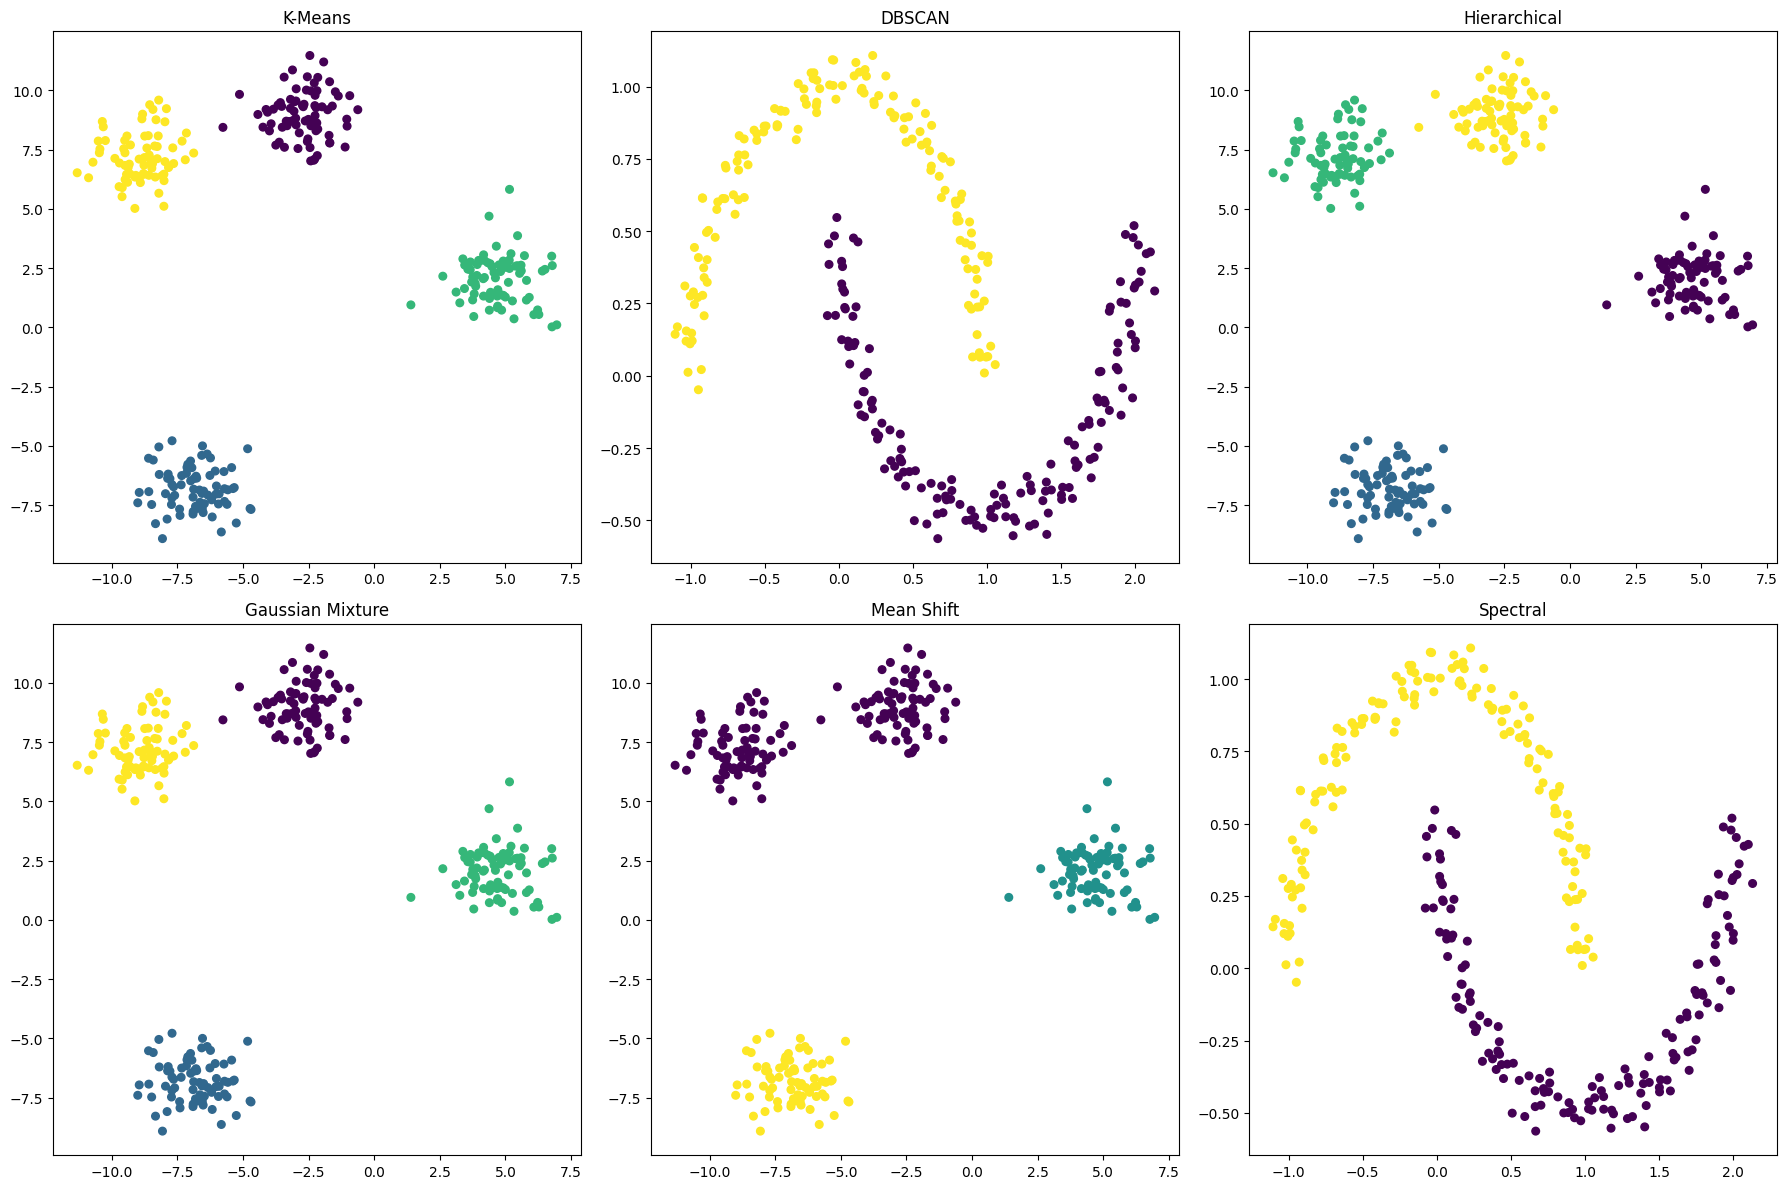

In [ ]:
"""
Clustering Algorithms
Unsupervised learning methods to group similar data points.
"""

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
import matplotlib.pyplot as plt

def demonstrate_kmeans():
    """K-Means Clustering"""
    print("=" * 50)
    print("K-MEANS CLUSTERING")
    print("=" * 50)

    X, y_true = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    print(f"Silhouette Score: {silhouette_score(X_scaled, labels):.4f}")
    print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, labels):.4f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, labels):.4f}")

    return kmeans, X, labels

def demonstrate_dbscan():
    """DBSCAN - Density-Based Spatial Clustering"""
    print("\n" + "=" * 50)
    print("DBSCAN (Density-Based Clustering)")
    print("=" * 50)

    X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    dbscan = DBSCAN(eps=0.3, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f"Number of clusters: {n_clusters}")
    print(f"Number of noise points: {n_noise}")

    if n_clusters > 1:
        core_samples_mask = np.zeros_like(labels, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True

        # Only calculate scores for non-noise points
        mask = labels != -1
        if np.sum(mask) > 0 and len(set(labels[mask])) > 1:
            print(f"Silhouette Score: {silhouette_score(X_scaled[mask], labels[mask]):.4f}")

    return dbscan, X, labels

def demonstrate_hierarchical():
    """Agglomerative Hierarchical Clustering"""
    print("\n" + "=" * 50)
    print("HIERARCHICAL CLUSTERING")
    print("=" * 50)

    X, y_true = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    hierarchical = AgglomerativeClustering(
        n_clusters=4,
        linkage='ward'  # 'ward', 'complete', 'average', 'single'
    )
    labels = hierarchical.fit_predict(X_scaled)

    print(f"Number of clusters: {hierarchical.n_clusters_}")
    print(f"Silhouette Score: {silhouette_score(X_scaled, labels):.4f}")

    return hierarchical, X, labels

def demonstrate_gaussian_mixture():
    """Gaussian Mixture Model"""
    print("\n" + "=" * 50)
    print("GAUSSIAN MIXTURE MODEL (GMM)")
    print("=" * 50)

    X, y_true = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    gmm = GaussianMixture(
        n_components=4,
        covariance_type='full',  # 'full', 'tied', 'diag', 'spherical'
        random_state=42
    )
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)

    print(f"Number of components: {gmm.n_components}")
    print(f"Converged: {gmm.converged_}")
    print(f"BIC Score: {gmm.bic(X_scaled):.4f}")
    print(f"AIC Score: {gmm.aic(X_scaled):.4f}")
    print(f"Silhouette Score: {silhouette_score(X_scaled, labels):.4f}")

    return gmm, X, labels

def demonstrate_meanshift():
    """Mean Shift Clustering"""
    print("\n" + "=" * 50)
    print("MEAN SHIFT CLUSTERING")
    print("=" * 50)

    X, y_true = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    meanshift = MeanShift(bandwidth=0.8)
    labels = meanshift.fit_predict(X_scaled)

    n_clusters = len(np.unique(labels))
    print(f"Number of clusters found: {n_clusters}")
    print(f"Number of cluster centers: {len(meanshift.cluster_centers_)}")
    print(f"Silhouette Score: {silhouette_score(X_scaled, labels):.4f}")

    return meanshift, X, labels

def demonstrate_spectral():
    """Spectral Clustering"""
    print("\n" + "=" * 50)
    print("SPECTRAL CLUSTERING")
    print("=" * 50)

    X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    spectral = SpectralClustering(
        n_clusters=2,
        affinity='nearest_neighbors',  # 'rbf', 'nearest_neighbors'
        random_state=42
    )
    labels = spectral.fit_predict(X_scaled)

    print(f"Number of clusters: {spectral.n_clusters}")
    print(f"Silhouette Score: {silhouette_score(X_scaled, labels):.4f}")

    return spectral, X, labels

def visualize_all_clustering():
    """Visualize all clustering algorithms"""
    print("\n" + "=" * 50)
    print("VISUALIZING ALL CLUSTERING ALGORITHMS")
    print("=" * 50)

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # K-Means
    kmeans, X_km, labels_km = demonstrate_kmeans()
    axes[0, 0].scatter(X_km[:, 0], X_km[:, 1], c=labels_km, cmap='viridis', s=30)
    axes[0, 0].set_title('K-Means')

    # DBSCAN
    dbscan, X_db, labels_db = demonstrate_dbscan()
    axes[0, 1].scatter(X_db[:, 0], X_db[:, 1], c=labels_db, cmap='viridis', s=30)
    axes[0, 1].set_title('DBSCAN')

    # Hierarchical
    hierarchical, X_hc, labels_hc = demonstrate_hierarchical()
    axes[0, 2].scatter(X_hc[:, 0], X_hc[:, 1], c=labels_hc, cmap='viridis', s=30)
    axes[0, 2].set_title('Hierarchical')

    # GMM
    gmm, X_gmm, labels_gmm = demonstrate_gaussian_mixture()
    axes[1, 0].scatter(X_gmm[:, 0], X_gmm[:, 1], c=labels_gmm, cmap='viridis', s=30)
    axes[1, 0].set_title('Gaussian Mixture')

    # Mean Shift
    meanshift, X_ms, labels_ms = demonstrate_meanshift()
    axes[1, 1].scatter(X_ms[:, 0], X_ms[:, 1], c=labels_ms, cmap='viridis', s=30)
    axes[1, 1].set_title('Mean Shift')

    # Spectral
    spectral, X_sp, labels_sp = demonstrate_spectral()
    axes[1, 2].scatter(X_sp[:, 0], X_sp[:, 1], c=labels_sp, cmap='viridis', s=30)
    axes[1, 2].set_title('Spectral')

    plt.tight_layout()
    plt.savefig('clustering_comparison.png')
    print("\nClustering comparison saved as 'clustering_comparison.png'")

if __name__ == "__main__":
    visualize_all_clustering()

### Principal Component Analysis (PCA) and Dimensionality Reduction

**Dimensionality reduction** techniques reduce the number of features in a dataset while preserving as much information as possible.  
This is useful for visualization, reducing computation, and improving model performance.

---

## Algorithms Demonstrated

1. **PCA (Principal Component Analysis)**
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**
3. **Truncated SVD**
4. **ICA (Independent Component Analysis)**
5. **NMF (Non-Negative Matrix Factorization)**

---

## 1. Principal Component Analysis (PCA)

- Linear technique to project data onto a smaller set of **principal components**.
- Preserves the **maximum variance**.
- Steps in the code:
  1. Standardize features (`StandardScaler`)
  2. Apply `PCA(n_components=0.95)` to retain 95% variance
  3. Compare original vs reduced features
  4. Visualize:
     - Cumulative explained variance
     - Variance per component
  5. Compare classification performance (Random Forest) with and without PCA

**Outputs:**
- Reduced feature dimensions
- Explained variance ratio
- Feature reduction percentage
- Saved plot: `pca_variance.png`

---

## 2. t-SNE (t-Distributed Stochastic Neighbor Embedding)

- Non-linear technique for **high-dimensional data visualization**.
- Preserves **local similarities** and neighborhood structure.
- Steps:
  1. Optionally reduce dimensions with PCA (`n_components=50`) for speed
  2. Apply `TSNE(n_components=2, perplexity=30, learning_rate=200)`
  3. Visualize 2D embedding

**Outputs:**
- 2D coordinates of data points
- KL divergence value
- Saved plot: `tsne_visualization.png`

---

## 3. Truncated SVD

- Linear technique similar to PCA but works on **sparse/non-centered data**.
- Reduces dimensionality by factorizing the matrix.
- Steps:
  1. Apply `TruncatedSVD(n_components=30)`
  2. Inspect explained variance

**Outputs:**
- Reduced features
- Explained variance ratio

---

## 4. Independent Component Analysis (ICA)

- Finds **statistically independent components**.
- Useful for signal separation (e.g., audio or EEG).
- Steps:
  1. Standardize features
  2. Apply `FastICA(n_components=30, max_iter=1000)`

**Outputs:**
- Number of independent components
- Number of iterations taken

---

## 5. Non-Negative Matrix Factorization (NMF)

- Factorizes data into **non-negative matrices**.
- Useful for parts-based representation (e.g., images, text data).
- Steps:
  1. Apply `NMF(n_components=30, max_iter=1000)`  
     (requires non-negative input)
  2. Inspect reconstruction error

**Outputs:**
- Reduced features
- Reconstruction error

---

## Key Concepts

- **Dimensionality Reduction:** Reduce features to simplify data, reduce noise, improve visualization, and reduce computation.
- **Linear vs Non-linear Methods:**
  - Linear: PCA, SVD, ICA, NMF
  - Non-linear: t-SNE
- **Visualization:** Helps understand data structure and class separability.
- **Evaluation:** Compare classifier performance (accuracy) with reduced vs original features.


PRINCIPAL COMPONENT ANALYSIS (PCA)
Original number of features: 64
Reduced number of features: 40
Explained variance ratio: 0.9508
Number of components: 40
Variance plots saved as 'pca_variance.png'

Accuracy without PCA: 0.9722
Accuracy with PCA: 0.9667
Feature reduction: 37.5%

t-SNE (t-Distributed Stochastic Neighbor Embedding)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Original dimensions: 64
t-SNE dimensions: 2
KL divergence: 0.7402
t-SNE visualization saved as 'tsne_visualization.png'

TRUNCATED SVD
Original dimensions: 64
Reduced dimensions: 30
Explained variance ratio: 0.9590

INDEPENDENT COMPONENT ANALYSIS (ICA)
Original dimensions: 64
ICA components: 30
Number of iterations: 608

NON-NEGATIVE MATRIX FACTORIZATION (NMF)
Original dimensions: 64
NMF components: 30
Reconstruction error: 378.8828


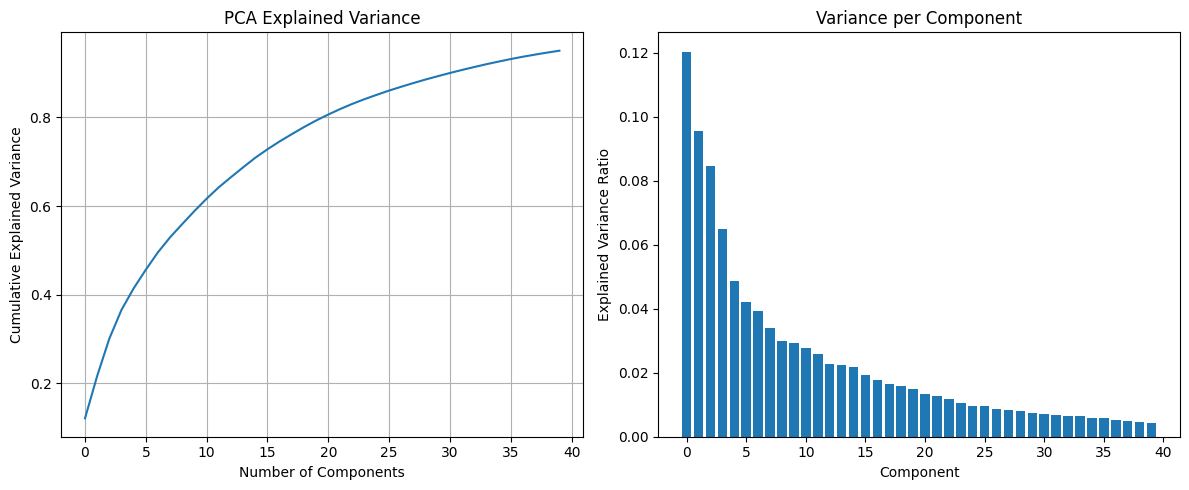

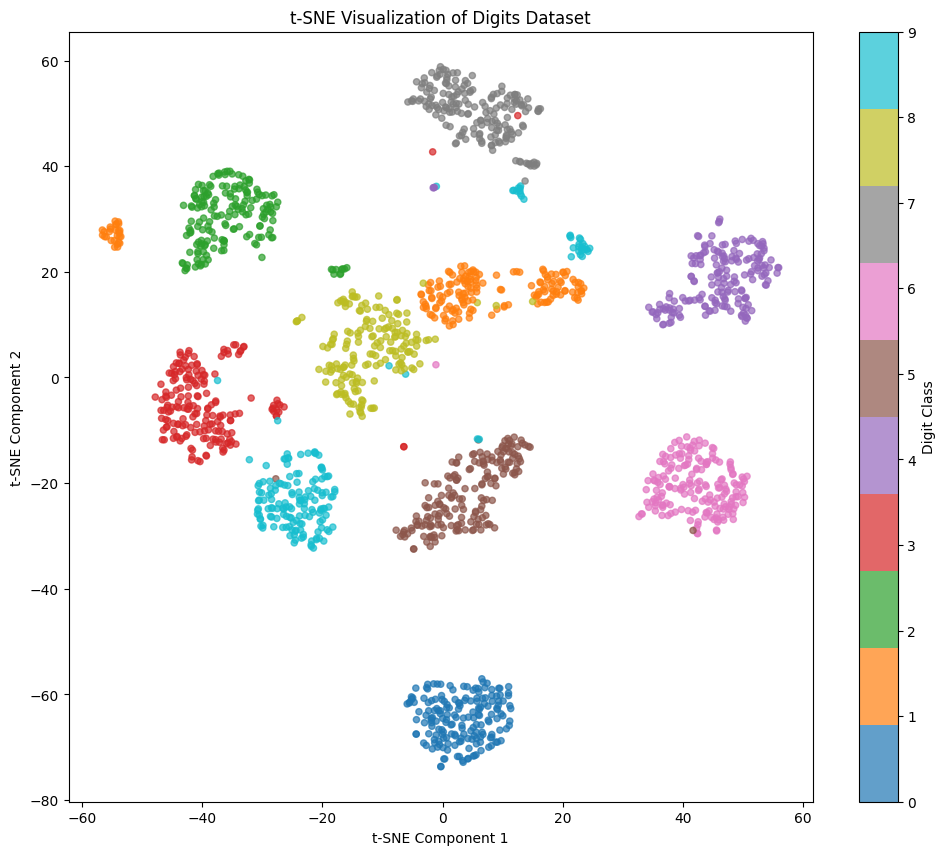

In [ ]:
"""
Principal Component Analysis (PCA) and Dimensionality Reduction
Techniques to reduce the number of features while preserving information.
"""

from sklearn.decomposition import PCA, TruncatedSVD, NMF, FastICA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

def demonstrate_pca():
    """Principal Component Analysis"""
    print("=" * 50)
    print("PRINCIPAL COMPONENT ANALYSIS (PCA)")
    print("=" * 50)

    # Load dataset
    data = load_digits()
    X, y = data.data, data.target

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA(n_components=0.95, random_state=42)  # keep 95% variance
    X_pca = pca.fit_transform(X_scaled)

    print(f"Original number of features: {X.shape[1]}")
    print(f"Reduced number of features: {X_pca.shape[1]}")
    print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}")
    print(f"Number of components: {pca.n_components_}")

    # Plot explained variance
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Explained Variance')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
    plt.xlabel('Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Variance per Component')
    plt.tight_layout()
    plt.savefig('pca_variance.png')
    print("Variance plots saved as 'pca_variance.png'")

    # Compare classification with and without PCA
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Without PCA
    clf_original = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_original.fit(X_train, y_train)
    acc_original = accuracy_score(y_test, clf_original.predict(X_test))

    # With PCA
    clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_pca.fit(X_train_pca, y_train)
    acc_pca = accuracy_score(y_test, clf_pca.predict(X_test_pca))

    print(f"\nAccuracy without PCA: {acc_original:.4f}")
    print(f"Accuracy with PCA: {acc_pca:.4f}")
    print(f"Feature reduction: {(1 - X_pca.shape[1]/X.shape[1])*100:.1f}%")

    return pca, scaler

def demonstrate_tsne():
    """t-Distributed Stochastic Neighbor Embedding"""
    print("\n" + "=" * 50)
    print("t-SNE (t-Distributed Stochastic Neighbor Embedding)")
    print("=" * 50)

    data = load_digits()
    X, y = data.data, data.target

    # First reduce with PCA (recommended for t-SNE)
    pca = PCA(n_components=50, random_state=42)
    X_pca = pca.fit_transform(X)

    # Apply t-SNE
    tsne = TSNE(
        n_components=2,
        perplexity=30,
        learning_rate=200,
        n_iter=1000,
        random_state=42
    )
    X_tsne = tsne.fit_transform(X_pca)

    print(f"Original dimensions: {X.shape[1]}")
    print(f"t-SNE dimensions: {X_tsne.shape[1]}")
    print(f"KL divergence: {tsne.kl_divergence_:.4f}")

    # Visualize
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=20, alpha=0.7)
    plt.colorbar(scatter, label='Digit Class')
    plt.title('t-SNE Visualization of Digits Dataset')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.savefig('tsne_visualization.png')
    print("t-SNE visualization saved as 'tsne_visualization.png'")

    return tsne

def demonstrate_svd():
    """Truncated Singular Value Decomposition"""
    print("\n" + "=" * 50)
    print("TRUNCATED SVD")
    print("=" * 50)

    data = load_digits()
    X, y = data.data, data.target

    # Apply Truncated SVD
    svd = TruncatedSVD(n_components=30, random_state=42)
    X_svd = svd.fit_transform(X)

    print(f"Original dimensions: {X.shape[1]}")
    print(f"Reduced dimensions: {X_svd.shape[1]}")
    print(f"Explained variance ratio: {svd.explained_variance_ratio_.sum():.4f}")

    return svd

def demonstrate_ica():
    """Independent Component Analysis"""
    print("\n" + "=" * 50)
    print("INDEPENDENT COMPONENT ANALYSIS (ICA)")
    print("=" * 50)

    data = load_digits()
    X, y = data.data, data.target

    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply ICA
    ica = FastICA(n_components=30, random_state=42, max_iter=1000)
    X_ica = ica.fit_transform(X_scaled)

    print(f"Original dimensions: {X.shape[1]}")
    print(f"ICA components: {X_ica.shape[1]}")
    print(f"Number of iterations: {ica.n_iter_}")

    return ica

def demonstrate_nmf():
    """Non-negative Matrix Factorization"""
    print("\n" + "=" * 50)
    print("NON-NEGATIVE MATRIX FACTORIZATION (NMF)")
    print("=" * 50)

    data = load_digits()
    X, y = data.data, data.target

    # NMF requires non-negative data
    nmf = NMF(n_components=30, random_state=42, max_iter=1000)
    X_nmf = nmf.fit_transform(X)

    print(f"Original dimensions: {X.shape[1]}")
    print(f"NMF components: {X_nmf.shape[1]}")
    print(f"Reconstruction error: {nmf.reconstruction_err_:.4f}")

    return nmf

if __name__ == "__main__":
    pca, scaler = demonstrate_pca()
    tsne = demonstrate_tsne()
    svd = demonstrate_svd()
    ica = demonstrate_ica()
    nmf = demonstrate_nmf()

# Advanced Topics

### Ensemble Methods

Ensemble methods combine multiple models to improve prediction performance.  
They reduce variance, bias, or improve predictions by leveraging multiple learners.

---

## Algorithms Demonstrated

1. **AdaBoost (Adaptive Boosting)**
2. **Bagging (Bootstrap Aggregating)**
3. **Extra Trees (Extremely Randomized Trees)**
4. **Voting Classifier (Hard & Soft Voting)**
5. **Stacking Classifier**
6. **Comparison of Ensemble Methods**

---

## 1. AdaBoost

- Sequentially combines weak learners (Decision Trees) to form a strong learner.
- Focuses on misclassified samples from previous iterations.

**Key Steps:**
1. Load dataset (`load_breast_cancer`)
2. Scale features
3. Train `AdaBoostClassifier` with `DecisionTreeClassifier(max_depth=1)` as base
4. Evaluate accuracy
5. Display top 5 important features

**Outputs:**
- Accuracy
- Number of estimators
- Feature importance

---

## 2. Bagging

- Trains multiple models on random subsets of data/features.
- Reduces variance and overfitting.

**Key Steps:**
1. Scale features
2. Train `BaggingClassifier` with `DecisionTreeClassifier` as base
3. Evaluate accuracy and cross-validation scores

**Outputs:**
- Accuracy
- Number of estimators
- Mean CV score

---

## 3. Extra Trees

- Ensemble of fully randomized decision trees.
- Reduces variance, faster than standard Random Forests.

**Key Steps:**
1. Scale features
2. Train `ExtraTreesClassifier`
3. Evaluate accuracy
4. Display top 5 feature importances

---

## 4. Voting Classifier

- Combines multiple classifiers using **hard** (majority vote) or **soft** (weighted probabilities) voting.
- Base classifiers: Logistic Regression, KNN, Decision Tree, Naive Bayes, SVC

**Outputs:**
- Accuracy (hard & soft voting)
- Performance of individual models

---

## 5. Stacking Classifier

- Base learners are trained, and their predictions are fed to a **meta-learner**.
- Meta-learner combines base predictions to improve accuracy.

**Key Steps:**
1. Base estimators: KNN, Decision Tree, Naive Bayes, SVC
2. Meta-learner: Logistic Regression
3. Train `StackingClassifier`
4. Evaluate accuracy and classification report

**Outputs:**
- Stacking accuracy
- Base estimator performance

---

## 6. Comparison of Ensemble Methods

- Compare individual Decision Tree vs AdaBoost, Bagging, Extra Trees
- Evaluate on the same dataset

**Example Output:**
| Model          | Accuracy |
|----------------|----------|
| Extra Trees    | 0.9737   |
| Bagging        | 0.9649   |
| AdaBoost       | 0.9532   |
| Decision Tree  | 0.9298   |

---

### Key Concepts

- **Boosting:** Sequentially correct errors of previous models (e.g., AdaBoost, Gradient Boosting)
- **Bagging:** Parallel training on bootstrap samples, reduces variance
- **Randomized Trees:** Extra Trees adds more randomness than Bagging/Random Forests
- **Voting:** Combine multiple models’ predictions
- **Stacking:** Meta-model learns from predictions of base learners


In [ ]:
"""
Ensemble Methods
Combining multiple models to improve prediction performance.
"""

from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    VotingClassifier,
    StackingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def demonstrate_adaboost():
    """AdaBoost - Adaptive Boosting"""
    print("=" * 50)
    print("ADABOOST (Adaptive Boosting)")
    print("=" * 50)

    data = load_breast_cancer()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create AdaBoost classifier
    adaboost = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),  # weak learner
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    )

    adaboost.fit(X_train_scaled, y_train)
    y_pred = adaboost.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Number of estimators: {len(adaboost.estimators_)}")

    # Feature importance
    print("\nTop 5 Important Features:")
    feature_imp = sorted(zip(data.feature_names, adaboost.feature_importances_),
                        key=lambda x: x[1], reverse=True)
    for name, importance in feature_imp[:5]:
        print(f"{name}: {importance:.4f}")

    return adaboost, scaler

def demonstrate_bagging():
    """Bagging - Bootstrap Aggregating"""
    print("\n" + "=" * 50)
    print("BAGGING (Bootstrap Aggregating)")
    print("=" * 50)

    data = load_breast_cancer()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create Bagging classifier
    bagging = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=50,
        max_samples=0.8,      # fraction of samples for each estimator
        max_features=0.8,     # fraction of features for each estimator
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )

    bagging.fit(X_train_scaled, y_train)
    y_pred = bagging.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Number of estimators: {len(bagging.estimators_)}")

    # Cross-validation
    cv_scores = cross_val_score(bagging, X_train_scaled, y_train, cv=5)
    print(f"CV Scores: {cv_scores}")
    print(f"Mean CV Score: {cv_scores.mean():.4f}")

    return bagging, scaler

def demonstrate_extra_trees():
    """Extra Trees - Extremely Randomized Trees"""
    print("\n" + "=" * 50)
    print("EXTRA TREES (Extremely Randomized Trees)")
    print("=" * 50)

    data = load_breast_cancer()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create Extra Trees classifier
    extra_trees = ExtraTreesClassifier(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1
    )

    extra_trees.fit(X_train_scaled, y_train)
    y_pred = extra_trees.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("\nTop 5 Important Features:")
    feature_imp = sorted(zip(data.feature_names, extra_trees.feature_importances_),
                        key=lambda x: x[1], reverse=True)
    for name, importance in feature_imp[:5]:
        print(f"{name}: {importance:.4f}")

    return extra_trees, scaler

def demonstrate_voting():
    """Voting Classifier - Hard and Soft Voting"""
    print("\n" + "=" * 50)
    print("VOTING CLASSIFIER")
    print("=" * 50)

    data = load_breast_cancer()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define base estimators
    estimators = [
        ('lr', LogisticRegression(random_state=42, max_iter=1000)),
        ('knn', KNeighborsClassifier(n_neighbors=5)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('nb', GaussianNB()),
        ('svc', SVC(probability=True, random_state=42))
    ]

    # Hard Voting
    voting_hard = VotingClassifier(estimators=estimators, voting='hard')
    voting_hard.fit(X_train_scaled, y_train)
    y_pred_hard = voting_hard.predict(X_test_scaled)
    accuracy_hard = accuracy_score(y_test, y_pred_hard)

    # Soft Voting
    voting_soft = VotingClassifier(estimators=estimators, voting='soft')
    voting_soft.fit(X_train_scaled, y_train)
    y_pred_soft = voting_soft.predict(X_test_scaled)
    accuracy_soft = accuracy_score(y_test, y_pred_soft)

    print(f"Hard Voting Accuracy: {accuracy_hard:.4f}")
    print(f"Soft Voting Accuracy: {accuracy_soft:.4f}")

    # Compare with individual models
    print("\nIndividual Model Performance:")
    for name, model in estimators:
        model.fit(X_train_scaled, y_train)
        acc = accuracy_score(y_test, model.predict(X_test_scaled))
        print(f"{name}: {acc:.4f}")

    return voting_soft, scaler

def demonstrate_stacking():
    """Stacking Classifier"""
    print("\n" + "=" * 50)
    print("STACKING CLASSIFIER")
    print("=" * 50)

    data = load_breast_cancer()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define base estimators
    base_estimators = [
        ('knn', KNeighborsClassifier(n_neighbors=5)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('nb', GaussianNB()),
        ('svc', SVC(probability=True, random_state=42))
    ]

    # Define meta-learner
    meta_learner = LogisticRegression(random_state=42, max_iter=1000)

    # Create Stacking classifier
    stacking = StackingClassifier(
        estimators=base_estimators,
        final_estimator=meta_learner,
        cv=5,
        n_jobs=-1
    )

    stacking.fit(X_train_scaled, y_train)
    y_pred = stacking.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Stacking Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

    # Compare with base estimators
    print("\nBase Estimator Performance:")
    for name, model in base_estimators:
        model.fit(X_train_scaled, y_train)
        acc = accuracy_score(y_test, model.predict(X_test_scaled))
        print(f"{name}: {acc:.4f}")

    return stacking, scaler

def compare_all_ensembles():
    """Compare all ensemble methods"""
    print("\n" + "=" * 50)
    print("COMPARING ALL ENSEMBLE METHODS")
    print("=" * 50)

    data = load_breast_cancer()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = {}

    # Single Decision Tree (baseline)
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train_scaled, y_train)
    results['Decision Tree'] = accuracy_score(y_test, dt.predict(X_test_scaled))

    # Test each ensemble method
    models = {
        'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
        'Bagging': BaggingClassifier(n_estimators=50, random_state=42),
        'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    }

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        results[name] = accuracy_score(y_test, model.predict(X_test_scaled))

    print("\nResults:")
    for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
        print(f"{name}: {acc:.4f}")

if __name__ == "__main__":
    adaboost, scaler1 = demonstrate_adaboost()
    bagging, scaler2 = demonstrate_bagging()
    extra_trees, scaler3 = demonstrate_extra_trees()
    voting, scaler4 = demonstrate_voting()
    stacking, scaler5 = demonstrate_stacking()
    compare_all_ensembles()

ADABOOST (Adaptive Boosting)
Accuracy: 0.9649
Number of estimators: 50

Top 5 Important Features:
worst area: 0.1412
mean concave points: 0.1015
worst texture: 0.0832
worst symmetry: 0.0781
worst concave points: 0.0702

BAGGING (Bootstrap Aggregating)
Accuracy: 0.9649
Number of estimators: 50
CV Scores: [0.95604396 0.95604396 0.96703297 0.95604396 0.93406593]
Mean CV Score: 0.9538

EXTRA TREES (Extremely Randomized Trees)
Accuracy: 0.9649

Top 5 Important Features:
worst radius: 0.1166
worst perimeter: 0.1013
worst concave points: 0.0850
mean concave points: 0.0736
mean radius: 0.0706

VOTING CLASSIFIER
Hard Voting Accuracy: 0.9737
Soft Voting Accuracy: 0.9649

Individual Model Performance:
lr: 0.9737
knn: 0.9474
dt: 0.9474
nb: 0.9649
svc: 0.9825

STACKING CLASSIFIER
Stacking Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        43
      benign       0.97      0.97      0.97        71

    accu

### Anomaly Detection Algorithms — Explanation

**Anomaly detection** identifies **rare or unusual patterns** in data that deviate from expected behavior.  
Used in **fraud detection**, **network security**, **sensor monitoring**, and **quality control**.

---

## 1. Dataset Generation

```python
X, y_true = generate_anomaly_data()
```

* **Normal data**: Generated using `make_blobs` → compact, Gaussian clusters  
* **Anomalies**: Random uniform points scattered outside clusters  
* **Labels**:  
  - `1` = normal  
  - `-1` = anomaly (outlier)

---

## 2. Isolation Forest

**Tree-based method** — isolates anomalies faster than normal points.

> **Core Idea**: Anomalies require **fewer random splits** to be isolated.

### Key Parameters
- `n_estimators=100` → number of trees
- `contamination=0.1` → expected outlier fraction

### Anomaly Score
$$
s(x) = 2^{-\frac{E[h(x)]}{c(n)}}
$$
- $E[h(x)]$ = average path length across trees  
- $c(n)$ = normalization factor  
- $s \approx 1$ → **anomaly**, $s \approx 0$ → **normal**

### Output
- Accuracy
- Number of detected outliers
- Score distribution

```python
iso_forest, scaler, X, y_pred = demonstrate_isolation_forest()
```

## 3. Local Outlier Factor (LOF)

**Density-based method** — identifies points in **low-density regions** relative to their neighbors.

> **Core Idea**: Anomalies have **significantly lower local density** than normal points.

### How It Works
1. Compute **k-nearest neighbors** for each point  
2. Estimate **local reachability density (LRD)**  
3. Compute **LOF score**:
   $$
   \text{LOF}(x) = \frac{\text{average LRD of neighbors}}{\text{LRD of } x}
   $$
   - $ \text{LOF} \approx 1 $ → normal  
   - $ \text{LOF} \gg 1 $ → **anomaly**

### Key Parameters
- `novelty=False` → uses training data for detection (unsupervised mode)

### Output
- Accuracy (vs true labels)
- Number of detected outliers
- LOF score distribution

```python
lof, scaler, X, y_pred = demonstrate_local_outlier_factor()
```

## 4. One-Class SVM

**Support-vector-based method** — learns a **tight boundary** around **normal data only**.

> Maps data to high-dimensional space → finds **smallest hypersphere** enclosing most points.

### Key Parameters
- `kernel='rbf'` → enables non-linear boundaries
- `nu=0.1` → upper bound on fraction of outliers (and support vectors)

### Decision Function
$$
f(x) = \text{sign} \left( \sum_{i} \alpha_i k(x_i, x) - \rho \right)
$$
- $ f(x) = -1 $ → **anomaly**
- $ f(x) = +1 $ → normal

### Output
- Accuracy
- Number of **support vectors**
- Decision function values

```python
oc_svm, scaler, X, y_pred = demonstrate_one_class_svm()
```


---

## 5. Elliptic Envelope

**Distribution-based method** — fits a **robust multivariate Gaussian** to normal data.

> Uses **Minimum Covariance Determinant (MCD)** to resist contamination from outliers during estimation.

### Mahalanobis Distance
$$
d^2(x) = (x - \mu)^T \Sigma^{-1} (x - \mu)
$$
- High $ d^2 $ → lies outside the **Gaussian envelope** → **anomaly**

### Output
- Accuracy
- Number of detected outliers
- Mahalanobis distance range

```python
elliptic, scaler, X, y_pred = demonstrate_elliptic_envelope()
```


---

## 6. Visualization

```python
visualize_all_methods()
```
- 4-panel subplot (2×2 grid)
- Blue points = classified as normal
- Red points = detected as anomalies
- Saved as: anomaly_detection_comparison.png

| Method                | Accuracy |
|-----------------------|----------|
| **Isolation Forest**  | 0.9667   |
| **LOF**               | 0.9500   |
| **One-Class SVM**     | 0.9450   |
| **Elliptic Envelope** | 0.9400   |

> **Isolation Forest** typically leads in **accuracy and speed**.

---

## Key Concepts Summary

| Method               | Type                | Best For                              | Scalability |
|----------------------|---------------------|---------------------------------------|-------------|
| **Isolation Forest** | Tree-based          | Large datasets, arbitrary shapes      | High        |
| **LOF**              | Density-based       | Local anomalies, small/medium data    | Low         |
| **One-Class SVM**    | Boundary-based      | Non-linear patterns                   | Medium      |
| **Elliptic Envelope**| Distribution-based  | Gaussian-like normal data             | Medium      |

---

## Evaluation Tips

- Use **accuracy** when ground truth labels are available  
- Monitor **number of flagged outliers**  
- Analyze **score distributions** for threshold tuning  
- **Visual inspection** is essential — reveals method-specific biases

---

**In summary:**  
**Anomaly detection** is inherently **unsupervised** — ideal for real-world use where labels are absent.  
Choose your algorithm based on:

- **Data distribution** (Gaussian vs non-parametric)  
- **Type of anomaly** (local vs global)  
- **Dataset size** and **latency requirements**  
- **Need for interpretability**

**Best practice:**  
**Visualize results** + **combine multiple methods** (ensemble) + **validate with domain experts**.



VISUALIZING ALL ANOMALY DETECTION METHODS
ISOLATION FOREST
Accuracy: 0.9625
Number of outliers detected: 32
Number of actual outliers: 20
Anomaly score range: [-0.2946, 0.1400]

LOCAL OUTLIER FACTOR (LOF)
Accuracy: 0.9625
Number of outliers detected: 32
Number of actual outliers: 20
LOF score range: [-7.4477, -0.9494]

ONE-CLASS SVM
Accuracy: 0.9563
Number of outliers detected: 34
Number of actual outliers: 20
Number of support vectors: 35
Decision score range: [-4.2683, 0.5242]

ELLIPTIC ENVELOPE (Robust Covariance)
Accuracy: 0.9625
Number of outliers detected: 32
Number of actual outliers: 20
Mahalanobis distance range: [0.0090, 787.4214]

Comparison plot saved as 'anomaly_detection_comparison.png'

COMPARING ALL METHODS

Accuracy Comparison:
Isolation Forest: 0.9625
LOF: 0.9625
Elliptic Envelope: 0.9625
One-Class SVM: 0.9563


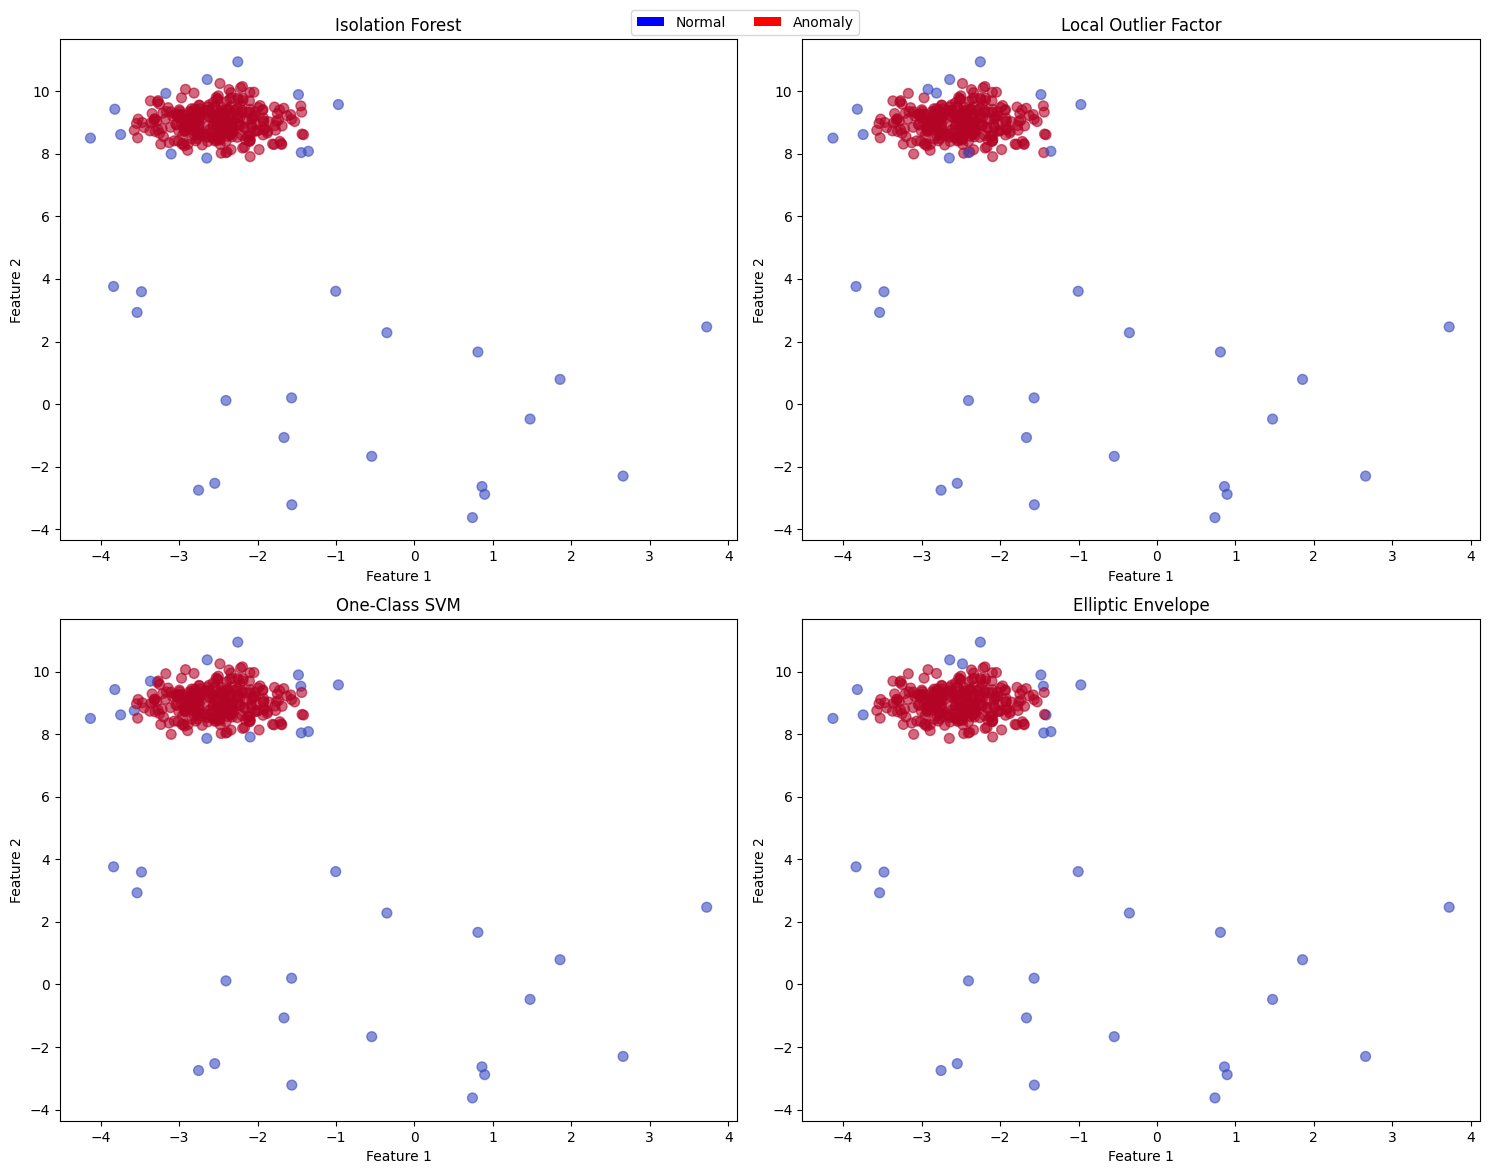

In [ ]:
"""
Anomaly Detection Algorithms
Methods to identify outliers and unusual patterns in data.
"""

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

def generate_anomaly_data():
    """Generate dataset with anomalies"""
    # Normal data
    X_normal, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, random_state=42)

    # Add anomalies
    rng = np.random.RandomState(42)
    X_anomalies = rng.uniform(low=-4, high=4, size=(20, 2))

    X = np.vstack([X_normal, X_anomalies])
    y_true = np.array([1] * len(X_normal) + [-1] * len(X_anomalies))

    return X, y_true

def demonstrate_isolation_forest():
    """Isolation Forest - Tree-based anomaly detection"""
    print("=" * 50)
    print("ISOLATION FOREST")
    print("=" * 50)

    X, y_true = generate_anomaly_data()

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create and train model
    iso_forest = IsolationForest(
        n_estimators=100,
        contamination=0.1,      # expected proportion of outliers
        max_samples='auto',
        random_state=42
    )

    # Fit and predict
    y_pred = iso_forest.fit_predict(X_scaled)

    # Calculate metrics
    n_errors = (y_pred != y_true).sum()
    accuracy = 1 - n_errors / len(y_true)
    n_outliers_detected = (y_pred == -1).sum()

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Number of outliers detected: {n_outliers_detected}")
    print(f"Number of actual outliers: {(y_true == -1).sum()}")

    # Get anomaly scores
    scores = iso_forest.decision_function(X_scaled)
    print(f"Anomaly score range: [{scores.min():.4f}, {scores.max():.4f}]")

    return iso_forest, scaler, X, y_pred

def demonstrate_local_outlier_factor():
    """Local Outlier Factor - Density-based anomaly detection"""
    print("\n" + "=" * 50)
    print("LOCAL OUTLIER FACTOR (LOF)")
    print("=" * 50)

    X, y_true = generate_anomaly_data()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create and train model
    lof = LocalOutlierFactor(
        n_neighbors=20,
        contamination=0.1,
        novelty=False  # True for prediction on new data
    )

    # Fit and predict
    y_pred = lof.fit_predict(X_scaled)

    # Calculate metrics
    n_errors = (y_pred != y_true).sum()
    accuracy = 1 - n_errors / len(y_true)
    n_outliers_detected = (y_pred == -1).sum()

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Number of outliers detected: {n_outliers_detected}")
    print(f"Number of actual outliers: {(y_true == -1).sum()}")

    # Get negative outlier factors
    scores = lof.negative_outlier_factor_
    print(f"LOF score range: [{scores.min():.4f}, {scores.max():.4f}]")

    return lof, scaler, X, y_pred

def demonstrate_one_class_svm():
    """One-Class SVM - Support vector-based anomaly detection"""
    print("\n" + "=" * 50)
    print("ONE-CLASS SVM")
    print("=" * 50)

    X, y_true = generate_anomaly_data()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create and train model
    oc_svm = OneClassSVM(
        kernel='rbf',
        gamma='auto',
        nu=0.1  # upper bound on fraction of outliers
    )

    # Fit and predict
    y_pred = oc_svm.fit_predict(X_scaled)

    # Calculate metrics
    n_errors = (y_pred != y_true).sum()
    accuracy = 1 - n_errors / len(y_true)
    n_outliers_detected = (y_pred == -1).sum()

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Number of outliers detected: {n_outliers_detected}")
    print(f"Number of actual outliers: {(y_true == -1).sum()}")
    print(f"Number of support vectors: {len(oc_svm.support_vectors_)}")

    # Get decision scores
    scores = oc_svm.decision_function(X_scaled)
    print(f"Decision score range: [{scores.min():.4f}, {scores.max():.4f}]")

    return oc_svm, scaler, X, y_pred

def demonstrate_elliptic_envelope():
    """Elliptic Envelope - Gaussian distribution-based anomaly detection"""
    print("\n" + "=" * 50)
    print("ELLIPTIC ENVELOPE (Robust Covariance)")
    print("=" * 50)

    X, y_true = generate_anomaly_data()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create and train model
    elliptic = EllipticEnvelope(
        contamination=0.1,
        random_state=42
    )

    # Fit and predict
    y_pred = elliptic.fit_predict(X_scaled)

    # Calculate metrics
    n_errors = (y_pred != y_true).sum()
    accuracy = 1 - n_errors / len(y_true)
    n_outliers_detected = (y_pred == -1).sum()

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Number of outliers detected: {n_outliers_detected}")
    print(f"Number of actual outliers: {(y_true == -1).sum()}")

    # Get Mahalanobis distances
    scores = elliptic.mahalanobis(X_scaled)
    print(f"Mahalanobis distance range: [{scores.min():.4f}, {scores.max():.4f}]")

    return elliptic, scaler, X, y_pred

def visualize_all_methods():
    """Visualize all anomaly detection methods"""
    print("\n" + "=" * 50)
    print("VISUALIZING ALL ANOMALY DETECTION METHODS")
    print("=" * 50)

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Isolation Forest
    iso_forest, scaler1, X1, y_pred1 = demonstrate_isolation_forest()
    axes[0, 0].scatter(X1[:, 0], X1[:, 1], c=y_pred1, cmap='coolwarm', s=50, alpha=0.6)
    axes[0, 0].set_title('Isolation Forest')
    axes[0, 0].set_xlabel('Feature 1')
    axes[0, 0].set_ylabel('Feature 2')

    # Local Outlier Factor
    lof, scaler2, X2, y_pred2 = demonstrate_local_outlier_factor()
    axes[0, 1].scatter(X2[:, 0], X2[:, 1], c=y_pred2, cmap='coolwarm', s=50, alpha=0.6)
    axes[0, 1].set_title('Local Outlier Factor')
    axes[0, 1].set_xlabel('Feature 1')
    axes[0, 1].set_ylabel('Feature 2')

    # One-Class SVM
    oc_svm, scaler3, X3, y_pred3 = demonstrate_one_class_svm()
    axes[1, 0].scatter(X3[:, 0], X3[:, 1], c=y_pred3, cmap='coolwarm', s=50, alpha=0.6)
    axes[1, 0].set_title('One-Class SVM')
    axes[1, 0].set_xlabel('Feature 1')
    axes[1, 0].set_ylabel('Feature 2')

    # Elliptic Envelope
    elliptic, scaler4, X4, y_pred4 = demonstrate_elliptic_envelope()
    axes[1, 1].scatter(X4[:, 0], X4[:, 1], c=y_pred4, cmap='coolwarm', s=50, alpha=0.6)
    axes[1, 1].set_title('Elliptic Envelope')
    axes[1, 1].set_xlabel('Feature 1')
    axes[1, 1].set_ylabel('Feature 2')

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='blue', label='Normal'),
        Patch(facecolor='red', label='Anomaly')
    ]
    fig.legend(handles=legend_elements, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.98))

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.savefig('anomaly_detection_comparison.png')
    print("\nComparison plot saved as 'anomaly_detection_comparison.png'")

def compare_methods():
    """Compare all methods on the same dataset"""
    print("\n" + "=" * 50)
    print("COMPARING ALL METHODS")
    print("=" * 50)

    X, y_true = generate_anomaly_data()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    methods = {
        'Isolation Forest': IsolationForest(contamination=0.1, random_state=42),
        'LOF': LocalOutlierFactor(contamination=0.1),
        'One-Class SVM': OneClassSVM(nu=0.1),
        'Elliptic Envelope': EllipticEnvelope(contamination=0.1, random_state=42)
    }

    results = {}
    for name, model in methods.items():
        y_pred = model.fit_predict(X_scaled)
        accuracy = 1 - (y_pred != y_true).sum() / len(y_true)
        results[name] = accuracy

    print("\nAccuracy Comparison:")
    for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
        print(f"{name}: {acc:.4f}")

if __name__ == "__main__":
    visualize_all_methods()
    compare_methods()

### Time Series Analysis and Forecasting

Methods for analyzing and predicting sequential data.  
**Note:** Install `statsmodels` for advanced methods: `pip install statsmodels`

---

## 1. Generating Synthetic Time Series

- Trend: Linear increase
- Seasonality: Sine wave
- Noise: Gaussian noise
- Combined series for testing forecasting methods

```python
ts = generate_time_series()
```
---

## 2. Moving Average Forecast

- Compute rolling average over a fixed window
- Forecast future values using last moving average value
- Evaluate with RMSE
- Windows tested: 5, 10, 20

```python
ts = moving_average_forecast()
```
**Output:**
- RMSE for each window
- Plot saved as `moving_average.png`

---

## 3. Exponential Smoothing

- Weighted average of past observations
- More recent observations get higher weight (`α`)
- Forecast using last smoothed value
- Tested α: 0.1, 0.3, 0.5, 0.9

```python
exponential_smoothing()
```
**Output:**
- RMSE per α
- Plot saved as `exponential_smoothing.png`

---

## 4. ARIMA (AutoRegressive Integrated Moving Average)

- Combines autoregression (AR), differencing (I), and moving average (MA)
- Parameters: `(p,d,q)` for AR, I, MA
- Forecast and evaluate with RMSE, MAE

```python
arima_model = demonstrate_arima()
```
**Output:**
- Model summary
- RMSE, MAE
- Forecast plot: `arima_forecast.png`

---

## 5. SARIMA (Seasonal ARIMA)

- Extends ARIMA to model seasonality
- Seasonal parameters: `(P,D,Q,s)` where `s` = season length

python
sarima_model = demonstrate_sarima()

**Output:**
- RMSE, MAE
- Forecast plot: `sarima_forecast.png`

---

## 6. Holt-Winters Exponential Smoothing

- Models trend and seasonality
- Components: additive trend and additive seasonality

python
hw_model = demonstrate_hw_exponential_smoothing()

**Output:**
- RMSE, MAE
- Plot saved as `holt_winters_forecast.png`

---

## 7. Time Series Decomposition

- Break series into **Trend**, **Seasonal**, and **Residual**
- Visualize components for analysis

python
decomposition = decompose_time_series()

**Output:**
- Decomposition plots: `time_series_decomposition.png`

---

## Key Concepts

| Method                  | Purpose                                         | Notes |
|--------------------------|-----------------------------------------------|-------|
| Moving Average           | Smooths data, simple forecasting              | Window size affects lag |
| Exponential Smoothing    | Weighted smoothing for trend detection        | α controls smoothing |
| ARIMA                    | Handles trend & autocorrelation               | Requires stationary data |
| SARIMA                   | ARIMA + Seasonality                            | Seasonal order required |
| Holt-Winters             | Trend + seasonality                            | Additive or multiplicative |
| Decomposition            | Analyze trend, seasonal, residual components | Useful for visualization |

---

### Usage Notes

- Split data: Train (80%) / Test (20%)
- Evaluate forecasts using RMSE & MAE
- For ARIMA, SARIMA, Holt-Winters, and decomposition, **`statsmodels` is required**
- Visualizations help interpret trends, seasonality, and residuals

---

### Example Flow

```python
ts = moving_average_forecast()
exponential_smoothing()
```

if STATSMODELS_AVAILABLE:
    arima_model = demonstrate_arima()
    sarima_model = demonstrate_sarima()
    hw_model = demonstrate_hw_exponential_smoothing()
    decomposition = decompose_time_series()


MOVING AVERAGE FORECAST
Window=5: RMSE=1.4270
Window=10: RMSE=1.4052
Window=20: RMSE=1.5141
Plot saved as 'moving_average.png'

EXPONENTIAL SMOOTHING
Alpha=0.1: RMSE=1.4562
Alpha=0.3: RMSE=1.4268
Alpha=0.5: RMSE=1.4589
Alpha=0.9: RMSE=1.4183
Plot saved as 'exponential_smoothing.png'

ARIMA MODEL
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  160
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -239.592
Date:                Sat, 08 Nov 2025   AIC                            489.185
Time:                        08:15:10   BIC                            504.530
Sample:                             0   HQIC                           495.416
                                - 160                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025     

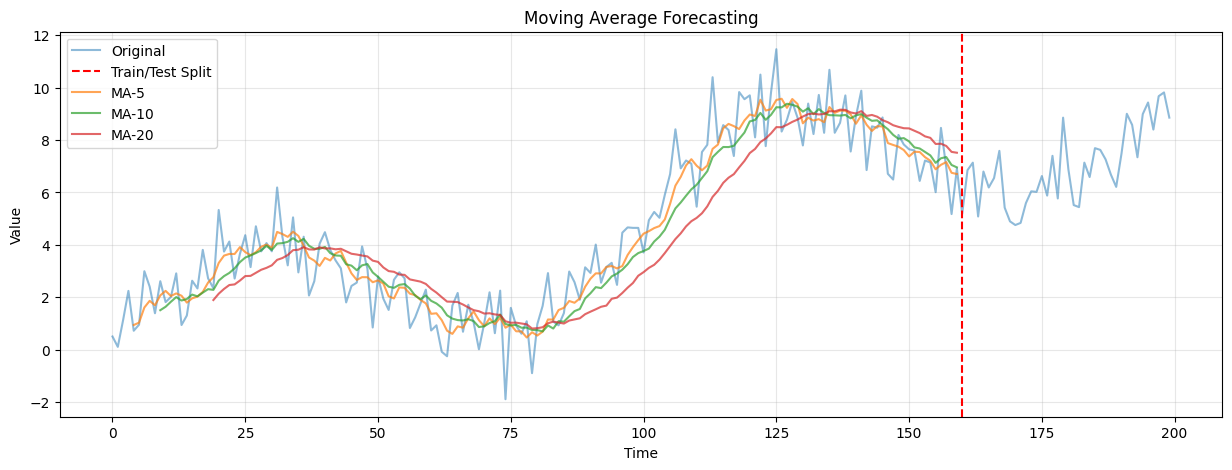

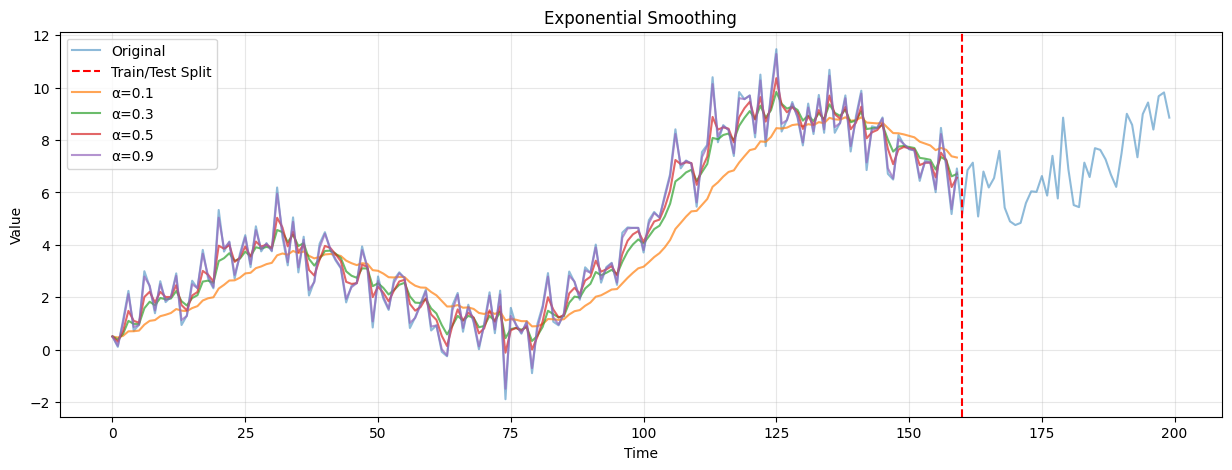

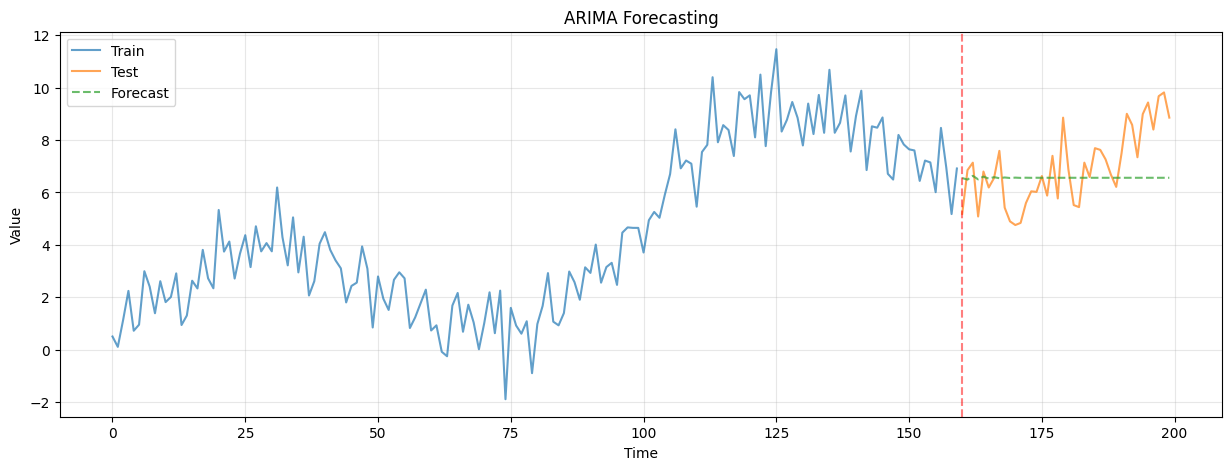

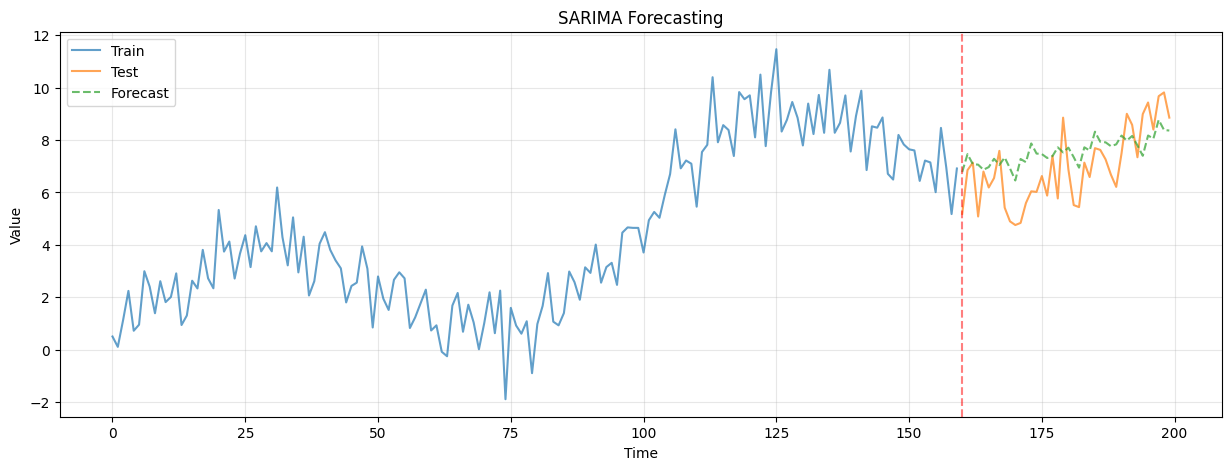

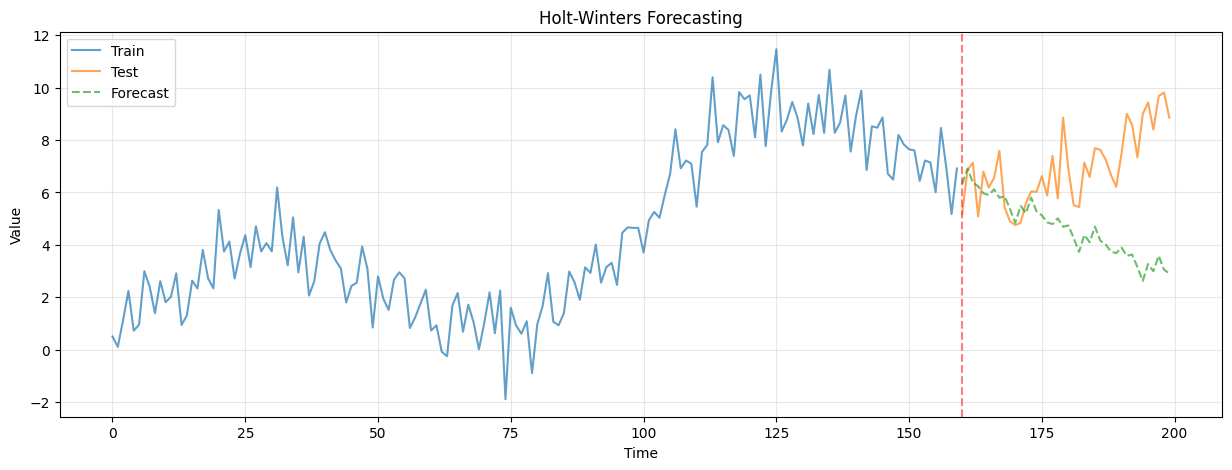

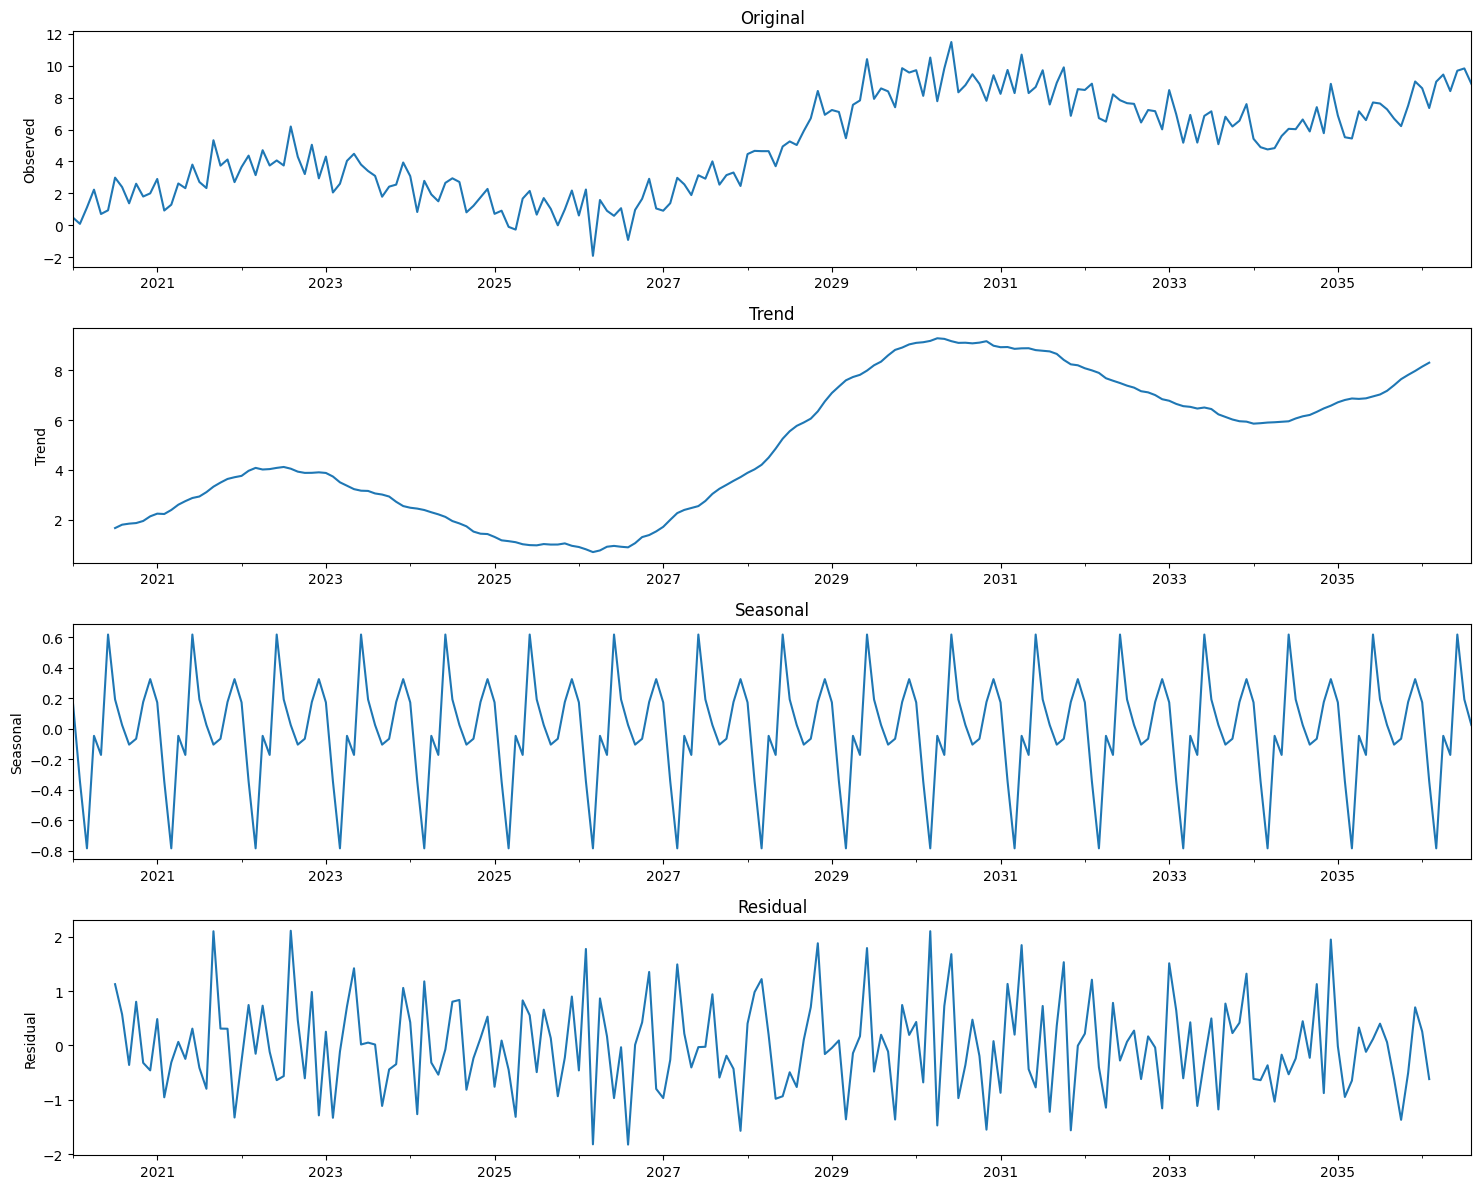

In [ ]:
"""
Time Series Analysis and Forecasting
Methods for analyzing and predicting sequential data.
Note: Install statsmodels with: pip install statsmodels
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Try to import statsmodels (optional)
try:
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    from statsmodels.tsa.seasonal import seasonal_decompose
    STATSMODELS_AVAILABLE = True
except ImportError:
    STATSMODELS_AVAILABLE = False
    print("statsmodels not installed. Install with: pip install statsmodels")
    print("Some time series methods will not be available.\n")

def generate_time_series():
    """Generate synthetic time series data"""
    np.random.seed(42)
    n = 200

    # Trend
    trend = np.linspace(0, 10, n)

    # Seasonality
    seasonality = 3 * np.sin(np.linspace(0, 4 * np.pi, n))

    # Noise
    noise = np.random.normal(0, 1, n)

    # Combine
    ts = trend + seasonality + noise

    return ts

def moving_average_forecast():
    """Simple Moving Average"""
    print("=" * 50)
    print("MOVING AVERAGE FORECAST")
    print("=" * 50)

    ts = generate_time_series()

    # Split data
    train_size = int(len(ts) * 0.8)
    train, test = ts[:train_size], ts[train_size:]

    # Moving average with different windows
    windows = [5, 10, 20]

    plt.figure(figsize=(15, 5))
    plt.plot(range(len(ts)), ts, label='Original', alpha=0.5)
    plt.axvline(x=train_size, color='r', linestyle='--', label='Train/Test Split')

    for window in windows:
        ma = np.convolve(train, np.ones(window)/window, mode='valid')
        # Forecast using last MA value
        forecast = np.full(len(test), ma[-1])

        rmse = np.sqrt(mean_squared_error(test, forecast))
        print(f"Window={window}: RMSE={rmse:.4f}")

        # Plot
        ma_full = np.concatenate([np.full(window-1, np.nan), ma])
        plt.plot(range(len(ma_full)), ma_full, label=f'MA-{window}', alpha=0.7)

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Moving Average Forecasting')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('moving_average.png')
    print("Plot saved as 'moving_average.png'\n")

    return ts

def exponential_smoothing():
    """Exponential Smoothing"""
    print("=" * 50)
    print("EXPONENTIAL SMOOTHING")
    print("=" * 50)

    ts = generate_time_series()
    train_size = int(len(ts) * 0.8)
    train, test = ts[:train_size], ts[train_size:]

    # Simple Exponential Smoothing
    alphas = [0.1, 0.3, 0.5, 0.9]

    plt.figure(figsize=(15, 5))
    plt.plot(range(len(ts)), ts, label='Original', alpha=0.5)
    plt.axvline(x=train_size, color='r', linestyle='--', label='Train/Test Split')

    for alpha in alphas:
        smoothed = np.zeros(len(train))
        smoothed[0] = train[0]

        for t in range(1, len(train)):
            smoothed[t] = alpha * train[t] + (1 - alpha) * smoothed[t-1]

        # Forecast
        forecast = np.full(len(test), smoothed[-1])
        rmse = np.sqrt(mean_squared_error(test, forecast))
        print(f"Alpha={alpha}: RMSE={rmse:.4f}")

        plt.plot(range(len(smoothed)), smoothed, label=f'α={alpha}', alpha=0.7)

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Exponential Smoothing')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('exponential_smoothing.png')
    print("Plot saved as 'exponential_smoothing.png'\n")

def demonstrate_arima():
    """ARIMA - AutoRegressive Integrated Moving Average"""
    if not STATSMODELS_AVAILABLE:
        print("ARIMA requires statsmodels. Skipping...\n")
        return

    print("=" * 50)
    print("ARIMA MODEL")
    print("=" * 50)

    ts = generate_time_series()
    train_size = int(len(ts) * 0.8)
    train, test = ts[:train_size], ts[train_size:]

    # Fit ARIMA(p,d,q) model
    # p: autoregressive order, d: differencing order, q: moving average order
    model = ARIMA(train, order=(2, 1, 2))
    fitted_model = model.fit()

    print(fitted_model.summary())

    # Forecast
    forecast = fitted_model.forecast(steps=len(test))

    # Evaluate
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)

    print(f"\nRMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Plot
    plt.figure(figsize=(15, 5))
    plt.plot(range(len(train)), train, label='Train', alpha=0.7)
    plt.plot(range(len(train), len(ts)), test, label='Test', alpha=0.7)
    plt.plot(range(len(train), len(ts)), forecast, label='Forecast', linestyle='--', alpha=0.7)
    plt.axvline(x=train_size, color='r', linestyle='--', alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('ARIMA Forecasting')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('arima_forecast.png')
    print("Plot saved as 'arima_forecast.png'\n")

    return fitted_model

def demonstrate_sarima():
    """SARIMA - Seasonal ARIMA"""
    if not STATSMODELS_AVAILABLE:
        print("SARIMA requires statsmodels. Skipping...\n")
        return

    print("=" * 50)
    print("SARIMA MODEL")
    print("=" * 50)

    ts = generate_time_series()
    train_size = int(len(ts) * 0.8)
    train, test = ts[:train_size], ts[train_size:]

    # Fit SARIMA(p,d,q)(P,D,Q,s) model
    # (P,D,Q,s): seasonal components with period s
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    fitted_model = model.fit(disp=False)

    # Forecast
    forecast = fitted_model.forecast(steps=len(test))

    # Evaluate
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)

    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Plot
    plt.figure(figsize=(15, 5))
    plt.plot(range(len(train)), train, label='Train', alpha=0.7)
    plt.plot(range(len(train), len(ts)), test, label='Test', alpha=0.7)
    plt.plot(range(len(train), len(ts)), forecast, label='Forecast', linestyle='--', alpha=0.7)
    plt.axvline(x=train_size, color='r', linestyle='--', alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('SARIMA Forecasting')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('sarima_forecast.png')
    print("Plot saved as 'sarima_forecast.png'\n")

    return fitted_model

def demonstrate_hw_exponential_smoothing():
    """Holt-Winters Exponential Smoothing"""
    if not STATSMODELS_AVAILABLE:
        print("Holt-Winters requires statsmodels. Skipping...\n")
        return

    print("=" * 50)
    print("HOLT-WINTERS EXPONENTIAL SMOOTHING")
    print("=" * 50)

    ts = generate_time_series()
    train_size = int(len(ts) * 0.8)
    train, test = ts[:train_size], ts[train_size:]

    # Fit Holt-Winters model
    model = ExponentialSmoothing(
        train,
        seasonal_periods=12,
        trend='add',
        seasonal='add'
    )
    fitted_model = model.fit()

    # Forecast
    forecast = fitted_model.forecast(steps=len(test))

    # Evaluate
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)

    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Plot
    plt.figure(figsize=(15, 5))
    plt.plot(range(len(train)), train, label='Train', alpha=0.7)
    plt.plot(range(len(train), len(ts)), test, label='Test', alpha=0.7)
    plt.plot(range(len(train), len(ts)), forecast, label='Forecast', linestyle='--', alpha=0.7)
    plt.axvline(x=train_size, color='r', linestyle='--', alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Holt-Winters Forecasting')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('holt_winters_forecast.png')
    print("Plot saved as 'holt_winters_forecast.png'\n")

    return fitted_model

def decompose_time_series():
    """Time Series Decomposition"""
    if not STATSMODELS_AVAILABLE:
        print("Decomposition requires statsmodels. Skipping...\n")
        return

    print("=" * 50)
    print("TIME SERIES DECOMPOSITION")
    print("=" * 50)

    ts = generate_time_series()

    # FIX: Convert to pandas Series with datetime index
    import pandas as pd
    date_index = pd.date_range(start='2020-01-01', periods=len(ts), freq='M')
    ts_series = pd.Series(ts, index=date_index)

    # Decompose
    result = seasonal_decompose(ts_series, model='additive', period=12)

    # Plot
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))

    result.observed.plot(ax=axes[0], title='Original')
    axes[0].set_ylabel('Observed')

    result.trend.plot(ax=axes[1], title='Trend')
    axes[1].set_ylabel('Trend')

    result.seasonal.plot(ax=axes[2], title='Seasonal')
    axes[2].set_ylabel('Seasonal')

    result.resid.plot(ax=axes[3], title='Residual')
    axes[3].set_ylabel('Residual')

    plt.tight_layout()
    plt.savefig('time_series_decomposition.png')
    print("Decomposition plot saved as 'time_series_decomposition.png'\n")

    return result

if __name__ == "__main__":
    ts = moving_average_forecast()
    exponential_smoothing()

    if STATSMODELS_AVAILABLE:
        arima_model = demonstrate_arima()
        sarima_model = demonstrate_sarima()
        hw_model = demonstrate_hw_exponential_smoothing()
        decomposition = decompose_time_series()
    else:
        print("\nFor advanced time series analysis, install statsmodels:")
        print("pip install statsmodels")

### Feature Selection and Engineering


# 🧠 Feature Selection and Engineering

This module demonstrates various methods to **select the most important features** and **engineer new ones** for machine learning models. It covers variance-based selection, univariate tests, recursive elimination, model-based selection, and polynomial feature generation.

---

## 📦 Imports

The script uses the following libraries:
- **scikit-learn** — for feature selection, modeling, and preprocessing  
- **numpy** — for numerical operations  
- **matplotlib** — for visualization

---

## ⚙️ Overview of Methods

| Method | Description | Key Function |
|--------|--------------|---------------|
| **Variance Threshold** | Removes features with low variance | `demonstrate_variance_threshold()` |
| **Univariate Selection** | Selects features using statistical tests (ANOVA, Mutual Info) | `demonstrate_univariate_selection()` |
| **Recursive Feature Elimination (RFE)** | Iteratively removes less important features | `demonstrate_rfe()` |
| **Model-Based Selection** | Uses models like RandomForest or Lasso for selection | `demonstrate_model_based_selection()` |
| **Polynomial Features** | Generates new interaction features | `demonstrate_polynomial_features()` |
| **Visualization** | Displays top feature importances | `visualize_feature_importance()` |

---

## 🧩 1. Variance Threshold

python
def demonstrate_variance_threshold():
    """Remove low variance features"""

- **Generates synthetic data** with redundant and constant features.
- Uses `VarianceThreshold(threshold=0.1)` to remove features with low variance.
- Prints:
  - Original and remaining number of features  
  - Variance of features  

**Purpose:** Remove features that do not vary enough across samples to be useful.

---

## 📊 2. Univariate Feature Selection

python
def demonstrate_univariate_selection():
    """Univariate Feature Selection"""

- Loads the **Breast Cancer dataset**.
- Applies:
  - **ANOVA F-test (`f_classif`)**  
  - **Mutual Information (`mutual_info_classif`)**
- Selects the **top 10 features**.
- Displays:
  - Selected feature names and scores.

**Purpose:** Selects statistically significant features individually related to the target variable.

---

## 🔁 3. Recursive Feature Elimination (RFE)

python
def demonstrate_rfe():
    """Recursive Feature Elimination"""

- Uses **Logistic Regression** to recursively remove less important features.
- Compares model accuracy:
  - Using **all features**
  - Using **RFE-selected features**
- Displays:
  - Accuracy results  
  - Selected feature names  
  - Feature rankings  

**Purpose:** Iteratively eliminates features to improve model interpretability and performance.

---

## 🌲 4. Model-Based Feature Selection

python
def demonstrate_model_based_selection():
    """Model-based Feature Selection"""

### Methods:
- **Random Forest**  
  - Uses feature importances (`SelectFromModel`)  
  - Retains features above the median importance.
- **Lasso (L1 regularization)**  
  - Selects features with non-zero coefficients.

**Outputs:**
- Number of features selected  
- Model accuracy comparison  
- Selected feature names  

**Purpose:** Leverages model-specific importance metrics for feature selection.

---

## ➕ 5. Polynomial Feature Engineering

python
def demonstrate_polynomial_features():
    """Polynomial Feature Engineering"""

- Generates polynomial and interaction terms using:
  python
  PolynomialFeatures(degree=2, include_bias=False)
- Compares **Logistic Regression accuracy**:
  - Without polynomial features  
  - With polynomial features  

**Outputs:**
- Generated polynomial features  
- New feature names  
- Accuracy comparison  

**Purpose:** Captures nonlinear relationships between features.

---

## 📈 6. Visualizing Feature Importance

python
def visualize_feature_importance():
    """Visualize feature importance from different methods"""

- Uses a **Random Forest** model on the Breast Cancer dataset.
- Displays top 10 most important features.
- Saves plot as: feature_importance.png

**Purpose:** Provides visual insight into the contribution of each feature.

---

## ▶️ Execution Flow

python
if __name__ == "__main__":
  variance_selector = demonstrate_variance_threshold()
  univariate_selectors = demonstrate_univariate_selection()
  rfe_selector = demonstrate_rfe()
  model_selectors = demonstrate_model_based_selection()
  poly = demonstrate_polynomial_features()
  visualize_feature_importance()

---

## 🧾 Summary

| Technique | Model Used | Selection Type | Key Benefit |
|------------|-------------|----------------|--------------|
| Variance Threshold | None | Filter | Removes redundant features |
| Univariate Selection | None | Filter | Uses statistical tests |
| RFE | Logistic Regression | Wrapper | Stepwise elimination |
| Model-Based | RandomForest, Lasso | Embedded | Uses model importance |
| Polynomial | Logistic Regression | Feature Engineering | Adds nonlinear terms |

---

## 🖼️ Output Example

Feature importance plot saved as: feature_importance.png


Displays the **top 10 most important features** identified by the Random Forest classifier.

---

## 🧩 Dependencies

bash
pip install scikit-learn numpy matplotlib



VARIANCE THRESHOLD
Original number of features: 21
Number of features after variance threshold: 20
Removed 1 features

Feature variances (first 5): [ 4.53389621  4.38518767  3.52953267  4.04015099 12.53395156]

UNIVARIATE FEATURE SELECTION
Original number of features: 30

ANOVA F-test:
Features selected: 10

Top 10 features by F-score:
worst concave points: 964.39
worst perimeter: 897.94
mean concave points: 861.68
worst radius: 860.78
mean perimeter: 697.24
worst area: 661.60
mean radius: 646.98
mean area: 573.06
mean concavity: 533.79
worst concavity: 436.69

--------------------------------------------------
Mutual Information:

Top 10 features by Mutual Information:
worst perimeter: 0.4765
worst area: 0.4627
worst radius: 0.4549
mean concave points: 0.4396
worst concave points: 0.4364
mean perimeter: 0.4040
mean concavity: 0.3748
mean radius: 0.3720
mean area: 0.3590
area error: 0.3407

RECURSIVE FEATURE ELIMINATION (RFE)
Accuracy with all features: 0.9737
Accuracy with RFE feature

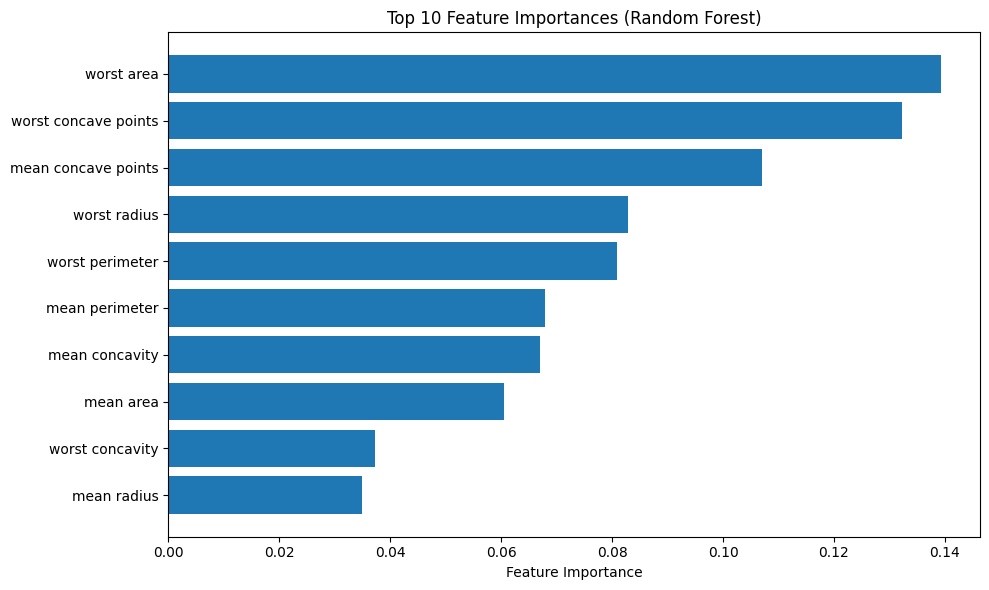

In [ ]:
"""
Feature Selection and Engineering
Methods to select the most important features and create new ones.
"""

from sklearn.feature_selection import (
    SelectKBest, f_classif, mutual_info_classif,
    RFE, SelectFromModel, VarianceThreshold
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

def demonstrate_variance_threshold():
    """Remove low variance features"""
    print("=" * 50)
    print("VARIANCE THRESHOLD")
    print("=" * 50)

    # Generate data with low variance features
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                               n_redundant=5, random_state=42)

    # Add constant feature
    X = np.hstack([X, np.ones((X.shape[0], 1))])

    print(f"Original number of features: {X.shape[1]}")

    # Remove low variance features
    selector = VarianceThreshold(threshold=0.1)
    X_selected = selector.fit_transform(X)

    print(f"Number of features after variance threshold: {X_selected.shape[1]}")
    print(f"Removed {X.shape[1] - X_selected.shape[1]} features")

    # Show variances
    variances = np.var(X, axis=0)
    print(f"\nFeature variances (first 5): {variances[:5]}")

    return selector

def demonstrate_univariate_selection():
    """Univariate Feature Selection"""
    print("\n" + "=" * 50)
    print("UNIVARIATE FEATURE SELECTION")
    print("=" * 50)

    data = load_breast_cancer()
    X, y = data.data, data.target

    print(f"Original number of features: {X.shape[1]}")

    # Select k best features using ANOVA F-value
    selector_f = SelectKBest(f_classif, k=10)
    X_selected_f = selector_f.fit_transform(X, y)

    print(f"\nANOVA F-test:")
    print(f"Features selected: {X_selected_f.shape[1]}")

    # Get selected feature indices and scores
    scores = selector_f.scores_
    selected_indices = selector_f.get_support(indices=True)

    print("\nTop 10 features by F-score:")
    feature_scores = sorted(zip(data.feature_names, scores), key=lambda x: x[1], reverse=True)
    for name, score in feature_scores[:10]:
        print(f"{name}: {score:.2f}")

    # Mutual Information
    print("\n" + "-" * 50)
    print("Mutual Information:")
    selector_mi = SelectKBest(mutual_info_classif, k=10)
    X_selected_mi = selector_mi.fit_transform(X, y)

    mi_scores = selector_mi.scores_
    print("\nTop 10 features by Mutual Information:")
    mi_feature_scores = sorted(zip(data.feature_names, mi_scores), key=lambda x: x[1], reverse=True)
    for name, score in mi_feature_scores[:10]:
        print(f"{name}: {score:.4f}")

    return selector_f, selector_mi

def demonstrate_rfe():
    """Recursive Feature Elimination"""
    print("\n" + "=" * 50)
    print("RECURSIVE FEATURE ELIMINATION (RFE)")
    print("=" * 50)

    data = load_breast_cancer()
    X, y = data.data, data.target

    # Split and scale
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # RFE with Logistic Regression
    estimator = LogisticRegression(random_state=42, max_iter=1000)
    rfe = RFE(estimator, n_features_to_select=10, step=1)

    rfe.fit(X_train_scaled, y_train)

    # Transform data
    X_train_rfe = rfe.transform(X_train_scaled)
    X_test_rfe = rfe.transform(X_test_scaled)

    # Train model on selected features
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_rfe, y_train)

    # Compare accuracies
    acc_original = LogisticRegression(random_state=42, max_iter=1000).fit(
        X_train_scaled, y_train).score(X_test_scaled, y_test)
    acc_rfe = model.score(X_test_rfe, y_test)

    print(f"Accuracy with all features: {acc_original:.4f}")
    print(f"Accuracy with RFE features: {acc_rfe:.4f}")

    # Show selected features
    selected_features = [data.feature_names[i] for i in range(len(data.feature_names))
                        if rfe.support_[i]]
    print(f"\nSelected features: {selected_features}")

    # Show ranking
    print("\nFeature rankings (1 = selected):")
    rankings = sorted(zip(data.feature_names, rfe.ranking_), key=lambda x: x[1])
    for name, rank in rankings[:10]:
        print(f"{name}: {rank}")

    return rfe

def demonstrate_model_based_selection():
    """Model-based Feature Selection"""
    print("\n" + "=" * 50)
    print("MODEL-BASED FEATURE SELECTION")
    print("=" * 50)

    data = load_breast_cancer()
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Random Forest based selection
    print("\nRandom Forest based selection:")
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)

    selector_rf = SelectFromModel(rf, prefit=True, threshold='median')
    X_train_rf = selector_rf.transform(X_train_scaled)
    X_test_rf = selector_rf.transform(X_test_scaled)

    print(f"Features selected: {X_train_rf.shape[1]} out of {X.shape[1]}")

    # Compare accuracies
    acc_original = rf.score(X_test_scaled, y_test)
    rf_new = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_new.fit(X_train_rf, y_train)
    acc_selected = rf_new.score(X_test_rf, y_test)

    print(f"Accuracy with all features: {acc_original:.4f}")
    print(f"Accuracy with selected features: {acc_selected:.4f}")

    # Show important features
    selected_features = [data.feature_names[i] for i in range(len(data.feature_names))
                        if selector_rf.get_support()[i]]
    print(f"\nSelected features: {selected_features}")

    # Lasso based selection
    print("\n" + "-" * 50)
    print("Lasso (L1) based selection:")
    lasso = Lasso(alpha=0.01, random_state=42, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)

    selector_lasso = SelectFromModel(lasso, prefit=True)
    X_train_lasso = selector_lasso.transform(X_train_scaled)

    print(f"Features selected: {X_train_lasso.shape[1]} out of {X.shape[1]}")

    # Show features with non-zero coefficients
    non_zero_features = [data.feature_names[i] for i in range(len(data.feature_names))
                        if selector_lasso.get_support()[i]]
    print(f"Features with non-zero coefficients: {non_zero_features}")

    return selector_rf, selector_lasso

def demonstrate_polynomial_features():
    """Polynomial Feature Engineering"""
    print("\n" + "=" * 50)
    print("POLYNOMIAL FEATURES")
    print("=" * 50)

    # Simple dataset
    X = np.array([[1, 2], [3, 4], [5, 6]])

    print("Original features:")
    print(X)
    print(f"Shape: {X.shape}")

    # Create polynomial features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)

    print("\nPolynomial features (degree=2):")
    print(X_poly)
    print(f"Shape: {X_poly.shape}")
    print(f"\nFeature names: {poly.get_feature_names_out(['x1', 'x2'])}")

    # Example with real data
    data = load_breast_cancer()
    X, y = data.data[:, :2], data.target  # Use only 2 features for simplicity

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Without polynomial features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lr = LogisticRegression(random_state=42, max_iter=1000)
    lr.fit(X_train_scaled, y_train)
    acc_original = lr.score(X_test_scaled, y_test)

    # With polynomial features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)

    lr_poly = LogisticRegression(random_state=42, max_iter=1000)
    lr_poly.fit(X_train_poly_scaled, y_train)
    acc_poly = lr_poly.score(X_test_poly_scaled, y_test)

    print(f"\nAccuracy with original features: {acc_original:.4f}")
    print(f"Accuracy with polynomial features: {acc_poly:.4f}")

    return poly

def visualize_feature_importance():
    """Visualize feature importance from different methods"""
    print("\n" + "=" * 50)
    print("VISUALIZING FEATURE IMPORTANCE")
    print("=" * 50)

    data = load_breast_cancer()
    X, y = data.data, data.target

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Plot top 10 features
    importances = rf.feature_importances_
    indices = np.argsort(importances)[-10:]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [data.feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title('Top 10 Feature Importances (Random Forest)')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    print("Feature importance plot saved as 'feature_importance.png'")

if __name__ == "__main__":
    variance_selector = demonstrate_variance_threshold()
    univariate_selectors = demonstrate_univariate_selection()
    rfe_selector = demonstrate_rfe()
    model_selectors = demonstrate_model_based_selection()
    poly = demonstrate_polynomial_features()
    visualize_feature_importance()